# Text Analyize

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Í≥†ÎπàÎèÑ Îã®Ïñ¥ Î∞è Ïù¥Í∑∏Îû® Î∂ÑÏÑù

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Load the processed dataframes from Google Drive
gemini_df_4 = pd.read_csv("/content/drive/MyDrive/AI_media_Text/ÏµúÏ¢ÖÎ¶¨Ìè¨Ìä∏/gemini_processed_4.csv")
gpt_df_4 = pd.read_csv("/content/drive/MyDrive/AI_media_Text/ÏµúÏ¢ÖÎ¶¨Ìè¨Ìä∏/gpt_processed_4.csv")
gemini_df_1 = pd.read_csv("/content/drive/MyDrive/AI_media_Text/ÏµúÏ¢ÖÎ¶¨Ìè¨Ìä∏/gemini_processed_1.csv")
gpt_df_1 = pd.read_csv("/content/drive/MyDrive/AI_media_Text/ÏµúÏ¢ÖÎ¶¨Ìè¨Ìä∏/gpt_processed_1.csv")

In [3]:
# Ïù¥ÎØ∏ process_df()Î°ú Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£åÎêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÇ¨Ïö©
# ÌÖçÏä§Ìä∏ Ïª¨Îüº: lemmatized Ïö∞ÏÑ†, ÏóÜÏúºÎ©¥ clean_text
def pick_text_col(df):
    for c in ["lemmatized", "clean_text", "stemmed"]:
        if c in df.columns:
            return c
    raise KeyError("ÌÖçÏä§Ìä∏ Ïª¨Îüº ÏóÜÏùå")

text_col = pick_text_col(gemini_df_4)

# ÌÖçÏä§Ìä∏ Ï∂îÏ∂ú
gpt_texts_4    = gpt_df_4[text_col].dropna().astype(str).tolist()
gemini_texts_4 = gemini_df_4[text_col].dropna().astype(str).tolist()
gpt_texts_1    = gpt_df_1[text_col].dropna().astype(str).tolist()
gemini_texts_1 = gemini_df_1[text_col].dropna().astype(str).tolist()


In [4]:
# --------------------------------
# 3.1.1 Ïú†ÎãàÍ∑∏Îû® Í≥†ÎπàÎèÑ Îã®Ïñ¥
# --------------------------------
vectorizer_uni = CountVectorizer(ngram_range=(1,1), min_df=3)

def top_n_words(texts, vectorizer, n=20):
    X = vectorizer.fit_transform(texts)
    freqs = X.toarray().sum(axis=0)
    vocab = vectorizer.get_feature_names_out()
    freq_df = pd.DataFrame({"token": vocab, "freq": freqs})
    return freq_df.sort_values(by="freq", ascending=False).head(n)

print("=== GPT_4 Í≥†ÎπàÎèÑ Îã®Ïñ¥ ===")
print(top_n_words(gpt_texts_4, vectorizer_uni, 20))

print("\n=== Gemini_4 Í≥†ÎπàÎèÑ Îã®Ïñ¥ ===")
print(top_n_words(gemini_texts_4, vectorizer_uni, 20))

print("\n=== GPT_1 Í≥†ÎπàÎèÑ Îã®Ïñ¥ ===")
print(top_n_words(gpt_texts_1, vectorizer_uni, 20))

print("\n=== Gemini_1 Í≥†ÎπàÎèÑ Îã®Ïñ¥ ===")
print(top_n_words(gemini_texts_1, vectorizer_uni, 20))

=== GPT_4 Í≥†ÎπàÎèÑ Îã®Ïñ¥ ===
          token  freq
190         app  7060
1483       good  4552
1950       like  2881
534     chatgpt  2228
530        chat  2194
3443       time  2122
102          ai  2023
1668      image  1805
2708     really  1805
1506      great  1804
3625        use  1801
1464       give  1627
1586       help  1566
171      answer  1534
2045       make  1524
1589    helpful  1508
3159  sometimes  1392
3415      thing  1351
3777       work  1341
2589    problem  1319

=== Gemini_4 Í≥†ÎπàÎèÑ Îã®Ïñ¥ ===
          token  freq
1043       good  6754
131         app  3064
1001     gemini  2628
1627       nice  1932
72           ai  1670
1399       like  1604
1045     google  1508
1060      great  1304
172   assistant  1063
1614       need  1029
258      better  1022
2597        use  1019
254        best  1010
2702       work   886
1118    helpful   850
115      answer   825
1948     really   733
2465       time   708
2641      voice   703
2314      still   701

=== GPT_1

In [5]:
# --------------------------------
# 3.1.2 Ïù¥Í∑∏Îû®(Bigram) Í≥†ÎπàÎèÑ
# --------------------------------
vectorizer_bi = CountVectorizer(ngram_range=(2,2), min_df=3)

def top_n_bigrams(texts, vectorizer, n=20):
    X = vectorizer.fit_transform(texts)
    freqs = X.toarray().sum(axis=0)
    vocab = vectorizer.get_feature_names_out()
    freq_df = pd.DataFrame({"bigram": vocab, "freq": freqs})
    return freq_df.sort_values(by="freq", ascending=False).head(n)

# 4Ï†ê Î¶¨Î∑∞
gpt_top_bi_4    = top_n_bigrams(gpt_texts_4, vectorizer_bi, 20)
gemini_top_bi_4 = top_n_bigrams(gemini_texts_4, vectorizer_bi, 20)

print("\n=== GPT_4 Ïù¥Í∑∏Îû® ===")
print(gpt_top_bi_4)

print("\n=== Gemini_4 Ïù¥Í∑∏Îû® ===")
print(gemini_top_bi_4)

# 1Ï†ê Î¶¨Î∑∞
gpt_top_bi_1 = top_n_bigrams(gpt_texts_1, vectorizer_bi, 20)
gemini_top_bi_1 = top_n_bigrams(gemini_texts_1, vectorizer_bi, 20)

print("\n=== GPT_1 Ïù¥Í∑∏Îû® ===")
print(gpt_top_bi_1)

print("\n=== Gemini_1 Ïù¥Í∑∏Îû® ===")
print(gemini_top_bi_1)


=== GPT_4 Ïù¥Í∑∏Îû® ===
               bigram  freq
3615         good app   787
1644         chat gpt   674
3959        great app   499
7459      really good   327
5629         love app   290
6322         nice app   276
835          app good   263
1317          best ai   259
1323         best app   242
2457         easy use   234
844          app help   204
6910       please fix   203
952        app really   184
7468   really helpful   180
3528        give star   172
4151         help lot   169
455       amazing app   168
170            ai app   163
621   answer question   161
3608          good ai   160

=== Gemini_4 Ïù¥Í∑∏Îû® ===
                bigram  freq
1602          good app   498
1794  google assistant   488
2733          nice app   232
1596           good ai   223
796           chat gpt   192
1868         great app   182
633            best ai   176
1122          far good   173
1003          easy use   170
3147       really good   169
635           best app   158
3011       

In [6]:
# -------------------------------
# Í≥µÌÜµ/Ï∞®Î≥Ñ Ïù¥Í∑∏Îû® ÎπÑÍµê Ìï®Ïàò
# -------------------------------
def compare_bigrams(gpt_df, gemini_df, label=""):
    set_gpt    = set(gpt_df["bigram"])
    set_gemini = set(gemini_df["bigram"])

    common   = set_gpt & set_gemini
    gpt_only = set_gpt - set_gemini
    gem_only = set_gemini - set_gpt

    print(f"\n=== Í≥µÌÜµ Ïù¥Í∑∏Îû® (GPT vs Gemini {label}) ===")
    print(common if common else "ÏóÜÏùå")
    print(f"\n=== GPT Ï†ÑÏö© Ïù¥Í∑∏Îû® ({label}) ===")
    print(gpt_only if gpt_only else "ÏóÜÏùå")
    print(f"\n=== Gemini Ï†ÑÏö© Ïù¥Í∑∏Îû® ({label}) ===")
    print(gem_only if gem_only else "ÏóÜÏùå")

# -------------------------------
# Î≥ÑÏ†ê 4Ï†ê ÎπÑÍµê
# -------------------------------
compare_bigrams(gpt_top_bi_4, gemini_top_bi_4, label="‚≠ê4Ï†ê Î¶¨Î∑∞")

# -------------------------------
# Î≥ÑÏ†ê 1Ï†ê ÎπÑÍµê
# -------------------------------
compare_bigrams(gpt_top_bi_1, gemini_top_bi_1, label="‚≠ê1Ï†ê Î¶¨Î∑∞")



=== Í≥µÌÜµ Ïù¥Í∑∏Îû® (GPT vs Gemini ‚≠ê4Ï†ê Î¶¨Î∑∞) ===
{'app good', 'best app', 'chat gpt', 'good ai', 'ai app', 'good app', 'best ai', 'really good', 'easy use', 'nice app', 'great app'}

=== GPT Ï†ÑÏö© Ïù¥Í∑∏Îû® (‚≠ê4Ï†ê Î¶¨Î∑∞) ===
{'help lot', 'love app', 'answer question', 'app help', 'app really', 'please fix', 'really helpful', 'amazing app', 'give star'}

=== Gemini Ï†ÑÏö© Ïù¥Í∑∏Îû® (‚≠ê4Ï†ê Î¶¨Î∑∞) ===
{'hey google', 'gemini live', 'gemini good', 'google assistant', 'far good', 'pretty good', 'google gemini', 'gemini app', 'need improvement'}

=== Í≥µÌÜµ Ïù¥Í∑∏Îû® (GPT vs Gemini ‚≠ê1Ï†ê Î¶¨Î∑∞) ===
{'chat gpt', 'generate image', 'every time'}

=== GPT Ï†ÑÏö© Ïù¥Í∑∏Îû® (‚≠ê1Ï†ê Î¶¨Î∑∞) ===
{'use app', 'went wrong', 'bring back', 'worst app', 'feel like', 'new update', 'free version', 'please fix', 'wrong answer', 'something went', 'try later', 'much time', 'give wrong', 'even though', 'waste time', 'many time', 'create image'}

=== Gemini Ï†ÑÏö© Ïù¥Í∑∏Îû® (‚≠ê1Ï†ê Î¶¨Î∑∞) ===

/tmp/ipython-input-3780935352.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


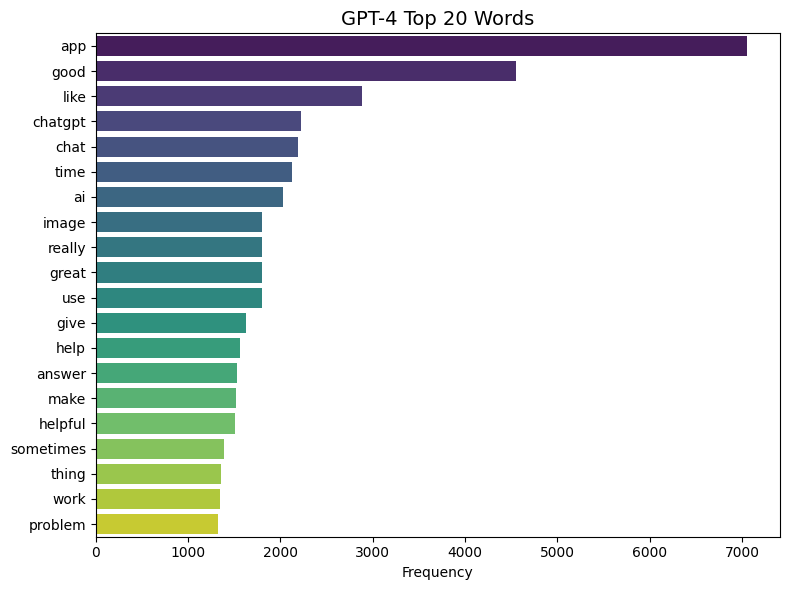

/tmp/ipython-input-3780935352.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


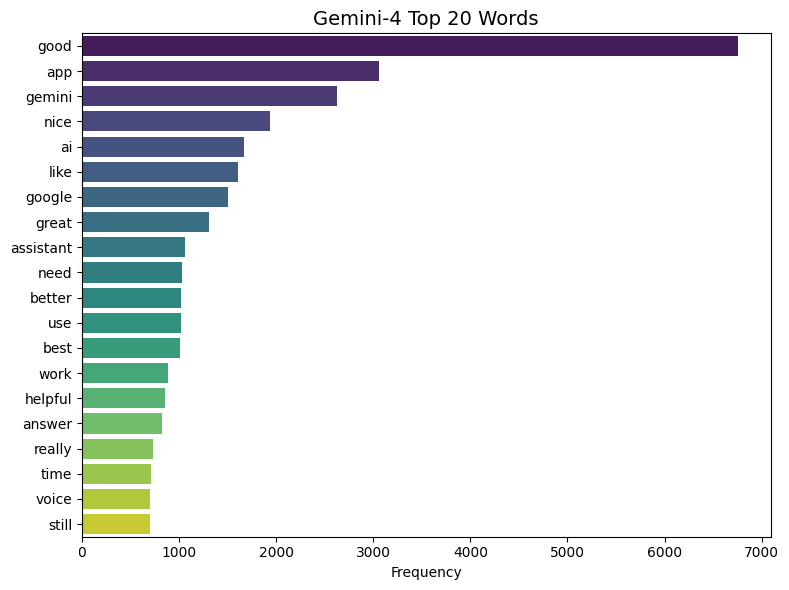

/tmp/ipython-input-3780935352.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


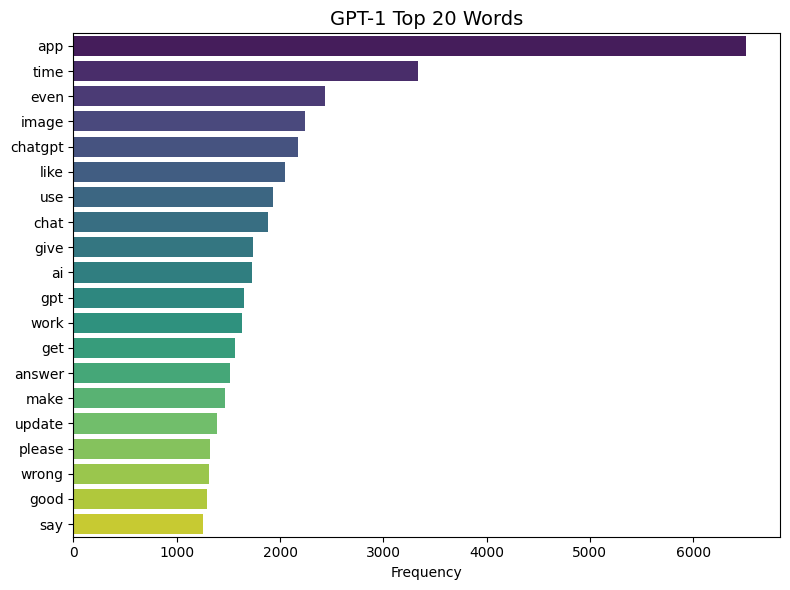

/tmp/ipython-input-3780935352.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


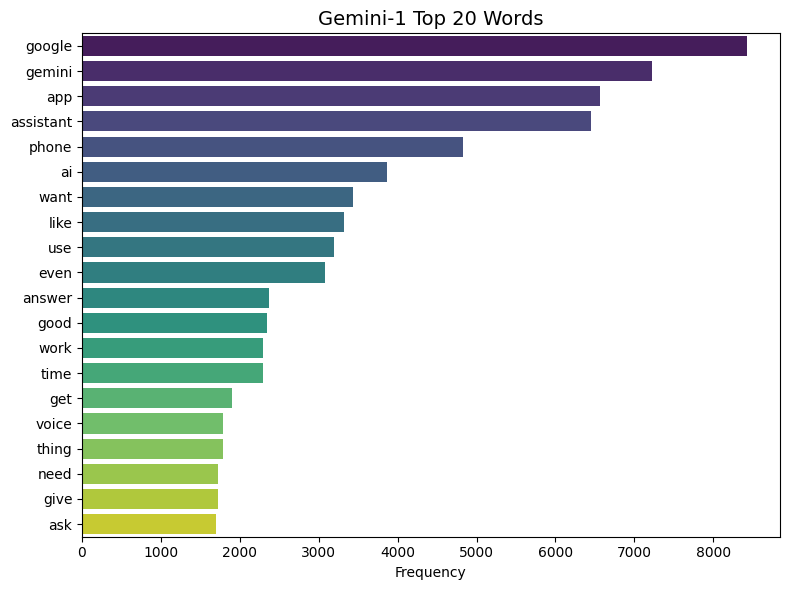

/tmp/ipython-input-3780935352.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


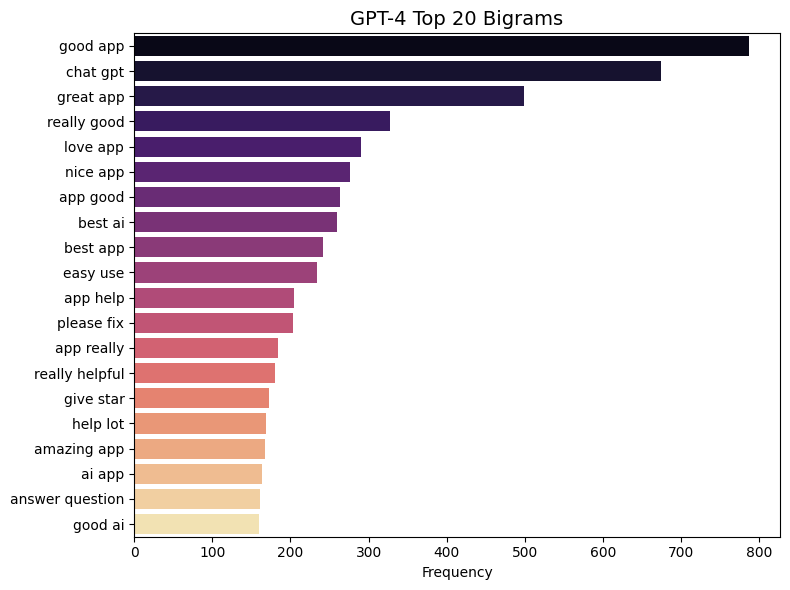

/tmp/ipython-input-3780935352.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


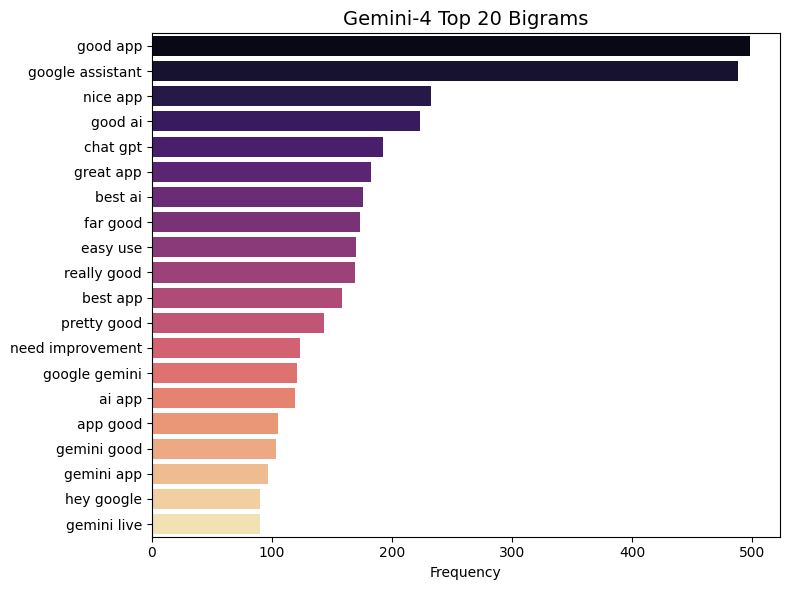

/tmp/ipython-input-3780935352.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


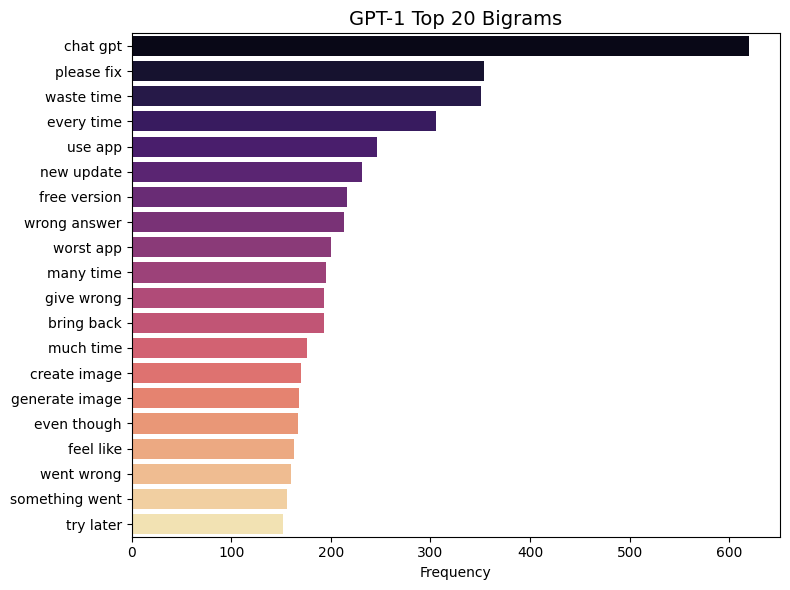

/tmp/ipython-input-3780935352.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


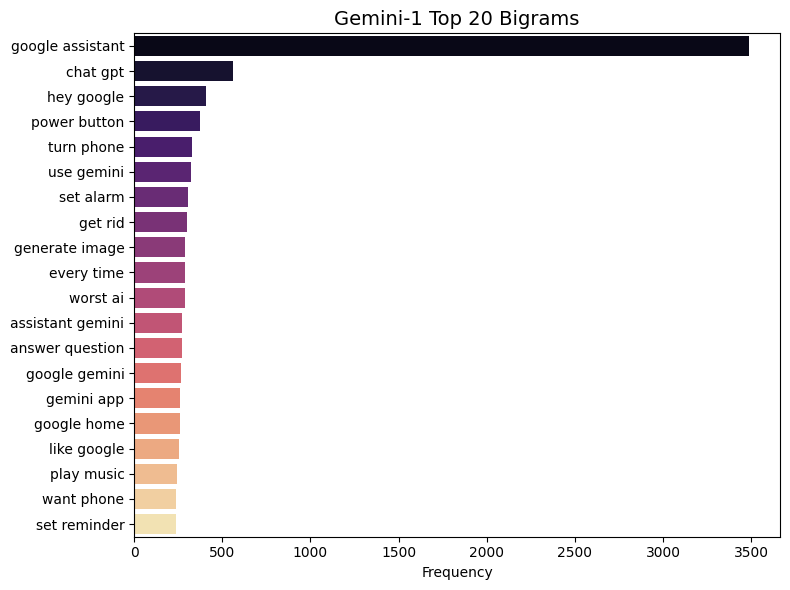

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------
# Ïú†ÎãàÍ∑∏Îû® ÏãúÍ∞ÅÌôî Ìï®Ïàò
# --------------------------
def plot_top_words(df, title, colname="token"):
    plt.figure(figsize=(8,6))
    sns.barplot(
        data=df.sort_values("freq", ascending=False),
        y=colname, x="freq", palette="viridis"
    )
    plt.title(title, fontsize=14)
    plt.xlabel("Frequency")
    plt.ylabel("")
    plt.tight_layout()
    plt.show()

# --------------------------
# Ïù¥Í∑∏Îû® ÏãúÍ∞ÅÌôî Ìï®Ïàò
# --------------------------
def plot_top_bigrams(df, title):
    plt.figure(figsize=(8,6))
    sns.barplot(
        data=df.sort_values("freq", ascending=False),
        y="bigram", x="freq", palette="magma"
    )
    plt.title(title, fontsize=14)
    plt.xlabel("Frequency")
    plt.ylabel("")
    plt.tight_layout()
    plt.show()

# --------------------------
# Ïú†ÎãàÍ∑∏Îû® ÏãúÍ∞ÅÌôî
# --------------------------
plot_top_words(top_n_words(gpt_texts_4, vectorizer_uni, 20), "GPT-4 Top 20 Words")
plot_top_words(top_n_words(gemini_texts_4, vectorizer_uni, 20), "Gemini-4 Top 20 Words")

plot_top_words(top_n_words(gpt_texts_1, vectorizer_uni, 20), "GPT-1 Top 20 Words")
plot_top_words(top_n_words(gemini_texts_1, vectorizer_uni, 20), "Gemini-1 Top 20 Words")

# --------------------------
# Ïù¥Í∑∏Îû® ÏãúÍ∞ÅÌôî
# --------------------------
plot_top_bigrams(top_n_bigrams(gpt_texts_4, vectorizer_bi, 20), "GPT-4 Top 20 Bigrams")
plot_top_bigrams(top_n_bigrams(gemini_texts_4, vectorizer_bi, 20), "Gemini-4 Top 20 Bigrams")
plot_top_bigrams(top_n_bigrams(gpt_texts_1, vectorizer_bi, 20), "GPT-1 Top 20 Bigrams")
plot_top_bigrams(top_n_bigrams(gemini_texts_1, vectorizer_bi, 20), "Gemini-1 Top 20 Bigrams")

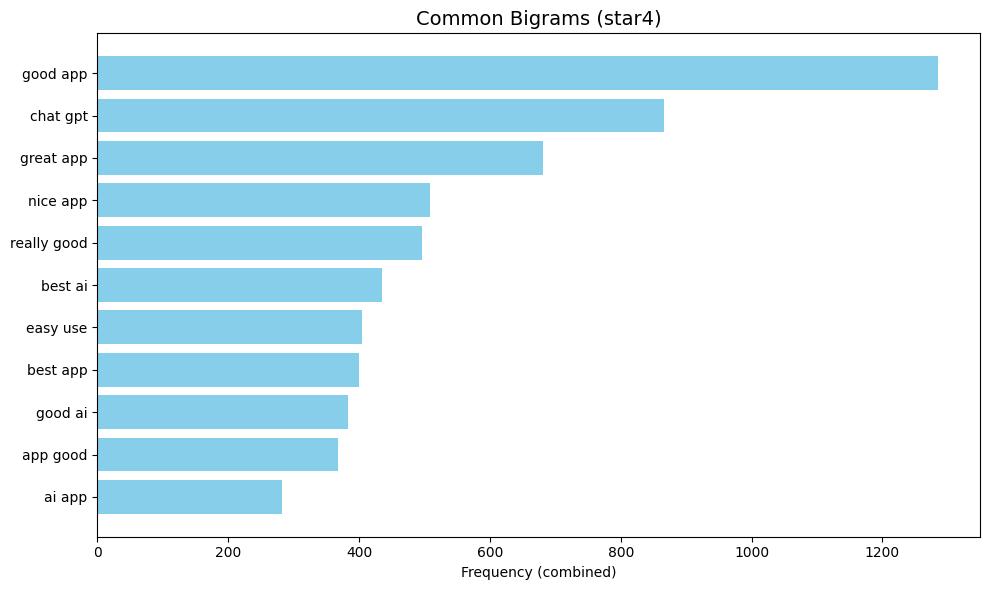

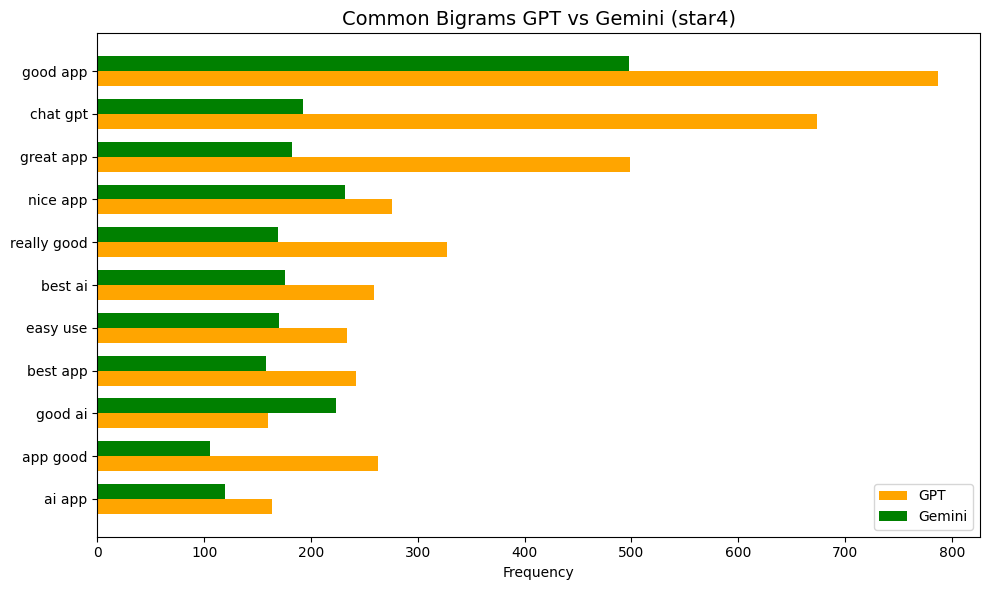

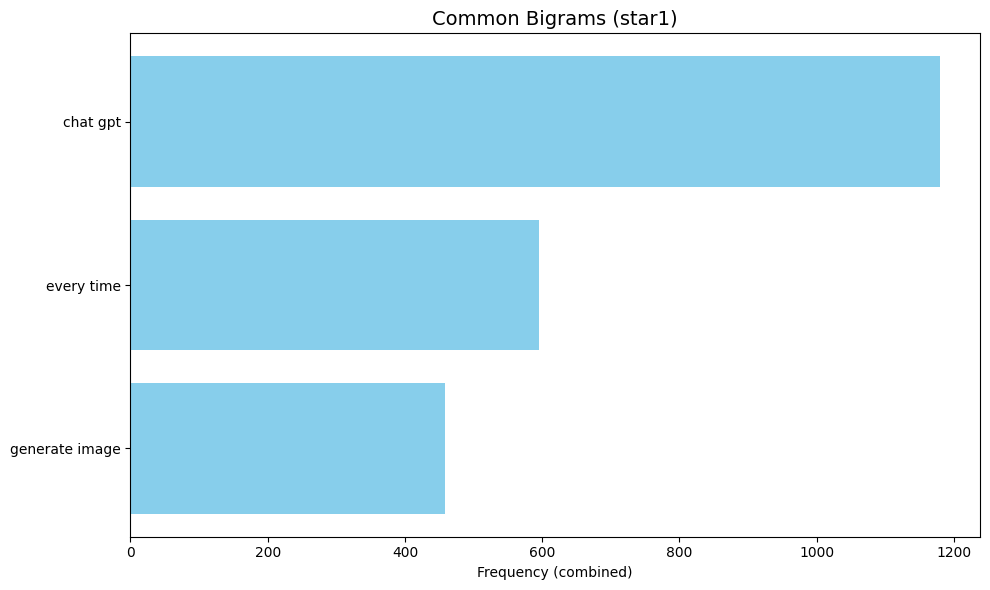

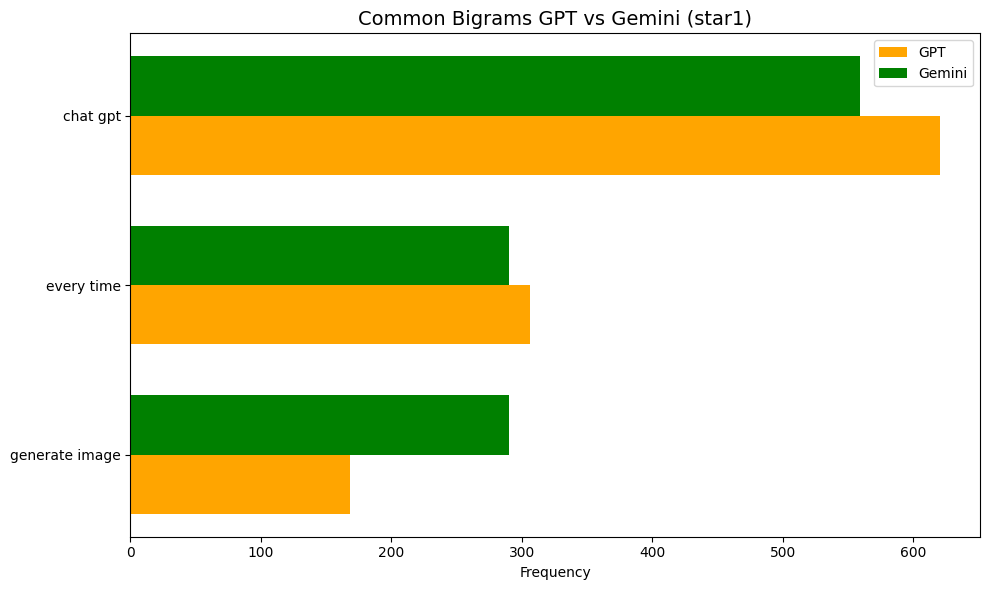

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# ------------------------------
# Í≥µÌÜµ Ïù¥Í∑∏Îû® ÌÖåÏù¥Î∏î ÎßåÎì§Í∏∞
# ------------------------------
def make_common_bigrams(gpt_df, gem_df, top_n=20):
    gpt = gpt_df[['bigram','freq']].copy().rename(columns={'freq':'freq_gpt'})
    gem = gem_df[['bigram','freq']].copy().rename(columns={'freq':'freq_gem'})

    # Í≥µÌÜµ bigramÎßå merge
    common_df = pd.merge(gpt, gem, on='bigram', how='inner')
    common_df['freq_comb'] = common_df['freq_gpt'] + common_df['freq_gem']

    # combined Í∏∞Ï§Ä Ï†ïÎ†¨
    common_df = common_df.sort_values('freq_comb', ascending=False).head(top_n)
    return common_df

# ------------------------------
# Í≥µÌÜµ Ïù¥Í∑∏Îû® ÏãúÍ∞ÅÌôî
# ------------------------------
def plot_common_bigrams(common_df, tag="star4", outdir="/content/drive/MyDrive/AI_media_Text/ÏµúÏ¢ÖÎ¶¨Ìè¨Ìä∏"):
    if common_df.empty:
        print(f"[Í≤ΩÍ≥†] {tag}: Í≥µÌÜµ bigram ÏóÜÏùå")
        return

    # Ï†ÄÏû• Ìè¥Îçî
    Path(outdir).mkdir(parents=True, exist_ok=True)

    # ÎßâÎåÄÍ∑∏ÎûòÌîÑ (Ìï©Í≥Ñ Í∏∞Ï§Ä)
    d = common_df.sort_values("freq_comb", ascending=True)
    plt.figure(figsize=(10,6))
    plt.barh(d["bigram"], d["freq_comb"], color="skyblue", label="GPT+Gemini Ìï©Í≥Ñ")
    plt.title(f"Common Bigrams ({tag})", fontsize=14)
    plt.xlabel("Frequency (combined)")
    plt.tight_layout()
    plt.savefig(f"{outdir}/bigrams_common_{tag}.png", dpi=200)
    plt.show()

    # (ÏÑ†ÌÉù) GPT vs Gemini Í∞úÎ≥Ñ ÎπàÎèÑ ÎπÑÍµê ÎßâÎåÄÍ∑∏ÎûòÌîÑ
    d = common_df.sort_values("freq_comb", ascending=True)
    bar_w = 0.35
    x = range(len(d))
    plt.figure(figsize=(10,6))
    plt.barh([i-bar_w/2 for i in x], d["freq_gpt"], bar_w, label="GPT", color="orange")
    plt.barh([i+bar_w/2 for i in x], d["freq_gem"], bar_w, label="Gemini", color="green")
    plt.yticks(x, d["bigram"])
    plt.title(f"Common Bigrams GPT vs Gemini ({tag})", fontsize=14)
    plt.xlabel("Frequency")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"{outdir}/bigrams_common_compare_{tag}.png", dpi=200)
    plt.show()

    # CSV Ï†ÄÏû•
    # common_df.to_csv(f"{outdir}/bigrams_common_{tag}.csv", index=False)
    # print(f"üíæ Ï†ÄÏû• ÏôÑÎ£å: {outdir}/bigrams_common_{tag}.(png/csv)")

# ------------------------------
# Ïã§Ìñâ ÏòàÏãú
# ------------------------------
# Î≥ÑÏ†ê 4Ï†ê Î¶¨Î∑∞ Í≥µÌÜµ bigram
common_bi_4 = make_common_bigrams(gpt_top_bi_4, gemini_top_bi_4, top_n=20)
plot_common_bigrams(common_bi_4, tag="star4")

# Î≥ÑÏ†ê 1Ï†ê Î¶¨Î∑∞ Í≥µÌÜµ bigram
common_bi_1 = make_common_bigrams(gpt_top_bi_1, gemini_top_bi_1, top_n=20)
plot_common_bigrams(common_bi_1, tag="star1")



## 2. ÎèôÏãú Ï∂úÌòÑÏñ¥ Î∂ÑÏÑù (ÎÑ§Ìä∏ÏõåÌÅ¨)


In [9]:
# ÎÑ§Ìä∏ÏõåÌÅ¨ Î∂ÑÏÑùÏùÑ ÏúÑÌïú Í∏∞Î≥∏ ÏÑ§Ï†ï

import pandas as pd
import numpy as np
import re
import itertools
from collections import Counter
import networkx as nx

# ÌÖçÏä§Ìä∏ Ïª¨Îüº ÏÑ†ÌÉù (lemmatized > clean_text > stemmed)
def pick_text_col(df: pd.DataFrame):
    for c in ["lemmatized", "clean_text", "stemmed"]:
        if c in df.columns:
            return c
    raise KeyError("ÌÖçÏä§Ìä∏ Ïª¨Îüº(lemmatized/clean_text/stemmed)Ïù¥ ÏóÜÏäµÎãàÎã§.")

# ÏïàÏ†Ñ ÌÜ†ÌÅ∞Ìôî (Ï†ÑÏ≤òÎ¶¨ Í∞ÄÏ†ï, ÏûîÏó¨ ÌäπÎ¨∏ Ï†úÍ±∞)
def to_tokens(text: str):
    if pd.isna(text): return []
    text = re.sub(r"[^a-z\s]", " ", str(text).lower())
    toks = [t for t in text.split() if t]
    return toks

# Î¨∏ÏÑú Í∏∞Ï§Ä ÏúàÎèÑÏö∞ co-occur Ïåç Ï∂îÏ∂ú
def cooccurrence_pairs(tokens, window_size=3):
    pairs = []
    L = len(tokens)
    for i in range(L):
        right = tokens[i+1:i+window_size]
        for w in right:
            if tokens[i] == w:
                continue
            a, b = sorted((tokens[i], w))
            pairs.append((a, b))
    return pairs

# ÏΩîÌçºÏä§ ÎÑ§Ìä∏ÏõåÌÅ¨ Íµ¨Ï∂ï + Í∏∞Î≥∏ Íµ¨Ï°∞ ÏßÄÌëú Í≥ÑÏÇ∞
def build_cooc_network(
    texts,
    window_size=3,
    min_pair_count=5,  # Í∞ÑÏÑ† ÏµúÏÜå ÎπàÎèÑ
    min_node_freq=5,   # ÎÖ∏Îìú ÏµúÏÜå Îì±Ïû• ÎπàÎèÑ
    top_edges=None     # ÏÉÅÏúÑ Í∞ÑÏÑ† Ïàò Ï†úÌïú (ÏãúÍ∞ÅÌôî/Í≤ΩÎüâÌôîÏö©)
):
    # ÌÜ†ÌÅ∞Ìôî
    tokenized = [to_tokens(t) for t in texts if isinstance(t, str) and len(t.strip()) > 0]
    # ÎÖ∏Îìú ÎπàÎèÑ
    node_freq = Counter(itertools.chain.from_iterable(tokenized))
    # Í∞ÑÏÑ† ÎπàÎèÑ
    pair_counter = Counter()
    for toks in tokenized:
        if len(toks) >= 2:
            pair_counter.update(cooccurrence_pairs(toks, window_size=window_size))
    # Í∞ÑÏÑ†/ÎÖ∏Îìú ÌïÑÌÑ∞ÎßÅ
    pairs = [(a,b,cnt) for (a,b),cnt in pair_counter.items()
             if cnt >= min_pair_count and node_freq[a] >= min_node_freq and node_freq[b] >= min_node_freq]
    if top_edges is not None and len(pairs) > top_edges:
        pairs = sorted(pairs, key=lambda x: x[2], reverse=True)[:top_edges]

    # Í∑∏ÎûòÌîÑ Íµ¨Ï∂ï
    G = nx.Graph()
    for w, f in node_freq.items():
        if f >= min_node_freq:
            G.add_node(w, freq=int(f))
    for a, b, w in pairs:
        if a in G and b in G:
            G.add_edge(a, b, weight=int(w))

    # ÎÖ∏Îìú ÏßÄÌëú
    deg = dict(G.degree())
    strength = {n: sum(d['weight'] for _,_,d in G.edges(n, data=True)) for n in G.nodes()}
    clustering = nx.clustering(G, weight='weight') if len(G) else {}
    # Ï§ëÏã¨ÏÑ± (Îç∞Ïù¥ÌÑ∞ ÌÅ¨Î©¥ Í≥ÑÏÇ∞ ÏãúÍ∞Ñ ‚Üë ‚Üí ÌïÑÏöî Ïãú ÏÉùÎûµ/ÏÉòÌîå)
    try:
        btw = nx.betweenness_centrality(G, weight='weight', normalized=True)
    except Exception:
        btw = {n: np.nan for n in G.nodes()}
    try:
        eig = nx.eigenvector_centrality_numpy(G, weight='weight')
    except Exception:
        eig = {n: np.nan for n in G.nodes()}

    node_df = pd.DataFrame({
        "node": list(G.nodes()),
        "freq": [G.nodes[n].get("freq", 0) for n in G.nodes()],
        "degree": [deg.get(n,0) for n in G.nodes()],
        "strength": [strength.get(n,0) for n in G.nodes()],
        "clustering": [clustering.get(n,0.0) for n in G.nodes()],
        "betweenness": [btw.get(n, np.nan) for n in G.nodes()],
        "eigenvector": [eig.get(n, np.nan) for n in G.nodes()],
    }).sort_values(["strength","degree","freq"], ascending=False)

    edge_df = pd.DataFrame(
        [(u,v,d["weight"]) for u,v,d in G.edges(data=True)],
        columns=["u","v","weight"]
    ).sort_values("weight", ascending=False)

    # Í∑∏ÎûòÌîÑ Ï†ÑÏ≤¥ ÏöîÏïΩ
    summary = {
        "n_nodes": G.number_of_nodes(),
        "n_edges": G.number_of_edges(),
        "density": nx.density(G) if G.number_of_nodes() > 1 else 0.0,
        "avg_degree": (2*G.number_of_edges()/G.number_of_nodes()) if G.number_of_nodes() > 0 else 0.0,
        "avg_clustering": nx.average_clustering(G, weight='weight') if G.number_of_nodes() > 0 else 0.0
    }
    return G, node_df, edge_df, summary


### GPT Î¶¨Î∑∞

In [10]:
# 4Ï†ê Î¶¨Î∑∞
# === Îç∞Ïù¥ÌÑ∞ ÏÑ†ÌÉù (Ïòà: Î≥ÑÏ†ê 4 Î¶¨Î∑∞) ===
text_col = pick_text_col(gpt_df_4)
gpt_texts = gpt_df_4[text_col].dropna().astype(str).tolist()

# === ÎÑ§Ìä∏ÏõåÌÅ¨ Íµ¨Ï∂ï & Íµ¨Ï°∞ ÏßÄÌëú ===
G_gpt, gpt_nodes, gpt_edges, gpt_sum = build_cooc_network(
    gpt_texts,
    window_size=3,
    min_pair_count=5,
    min_node_freq=5,
    top_edges=300
)
print("ChatGPT ÎÑ§Ìä∏ÏõåÌÅ¨ ÏöîÏïΩ:", gpt_sum)
display(gpt_nodes.head(15))  # ÌïµÏã¨ ÎÖ∏Îìú TOP15
display(gpt_edges.head(15))  # Í∞ïÌïú Í∞ÑÏÑ† TOP15


ChatGPT ÎÑ§Ìä∏ÏõåÌÅ¨ ÏöîÏïΩ: {'n_nodes': 2861, 'n_edges': 300, 'density': 7.332758119196428e-05, 'avg_degree': 0.20971688220901782, 'avg_clustering': 0.0014571105109997106}


node  freq  degree  strength  clustering  betweenness  eigenvector
72       app  7060      65     11290    0.010148     0.000727          NaN
221     good  4552      39      5489    0.018971     0.000287          NaN
33      like  2881      26      2669    0.019912     0.000325          NaN
49      time  2122      20      2236    0.019571     0.000143          NaN
16    really  1805      13      1950    0.058141     0.000046          NaN
90      give  1627      14      1861    0.031962     0.000069          NaN
45        ai  2023      14      1732    0.039681     0.000044          NaN
84      chat  2194      12      1606    0.024306     0.000065          NaN
79     image  1805      15      1596    0.014034     0.000196          NaN
269     help  1566      15      1571    0.029984     0.000083          NaN
136  chatgpt  2228      15      1551    0.038451     0.000088          NaN
118    great  1804      10      1465    0.046366     0.000039          NaN
249   answer  1534      10      1420    0.039492     0.000045          NaN
201     make  1524      16      1311    0.018012     0.000175          NaN
37       use  1801       9      1148    0.056496     0.000040          NaN

u        v  weight
121       app     good    1316
122       app    great     727
71        gpt     chat     703
18     really      app     461
94       time     take     426
123       app     best     419
124       app     love     416
125       app     nice     400
19     really     good     394
126       app  helpful     393
38       like      app     357
196      give   answer     354
127       app  amazing     336
128       app   useful     333
217  question   answer     325

In [11]:
# 1Ï†ê Î¶¨Î∑∞
# === Îç∞Ïù¥ÌÑ∞ ÏÑ†ÌÉù (Ïòà: Î≥ÑÏ†ê 4 Î¶¨Î∑∞) ===
text_col = pick_text_col(gpt_df_1)
gpt_texts = gpt_df_1[text_col].dropna().astype(str).tolist()

# === ÎÑ§Ìä∏ÏõåÌÅ¨ Íµ¨Ï∂ï & Íµ¨Ï°∞ ÏßÄÌëú ===
G_gpt, gpt_nodes, gpt_edges, gpt_sum = build_cooc_network(
    gpt_texts,
    window_size=3,
    min_pair_count=5,
    min_node_freq=5,
    top_edges=300
)
print("ChatGPT ÎÑ§Ìä∏ÏõåÌÅ¨ ÏöîÏïΩ:", gpt_sum)
display(gpt_nodes.head(15))  # ÌïµÏã¨ ÎÖ∏Îìú TOP15
display(gpt_edges.head(15))  # Í∞ïÌïú Í∞ÑÏÑ† TOP15


ChatGPT ÎÑ§Ìä∏ÏõåÌÅ¨ ÏöîÏïΩ: {'n_nodes': 3356, 'n_edges': 300, 'density': 5.3288902230851074e-05, 'avg_degree': 0.17878426698450536, 'avg_clustering': 0.002069664989823306}


node  freq  degree  strength  clustering  betweenness  eigenvector
65         app  6516      68      7807    0.006360     0.001391          NaN
154       time  3337      32      3944    0.015771     0.000515          NaN
45       image  2246      21      2101    0.010990     0.000332          NaN
113      wrong  1310      11      1640    0.049547     0.000133          NaN
145       give  1737      11      1472    0.057477     0.000095          NaN
591     answer  1513       9      1369    0.058475     0.000034          NaN
49        even  2439      14      1298    0.043872     0.000159          NaN
58      please  1323      10      1216    0.040688     0.000091          NaN
129        use  1929      11      1183    0.052868     0.000066          NaN
51         gpt  1656       8      1183    0.040676     0.000138          NaN
181       chat  1882       8      1166    0.044291     0.000269          NaN
96       error  1137      13      1003    0.014560     0.000271          NaN
38      update  1393       8       940    0.012441     0.000087          NaN
285    version  1229      10       932    0.010030     0.000105          NaN
112  something  1031       7       882    0.045260     0.000030          NaN

u         v  weight
79         gpt      chat     646
233       time     waste     443
98      please       fix     408
112        app       use     403
234       time     every     355
227       give    answer     318
201      wrong    answer     314
113        app      good     278
114        app      time     272
115        app     worst     263
33      update       new     263
195  something     wrong     251
235       time      take     243
116        app   working     242
45       image  generate     241

### Gemini Î∂ÑÏÑù

In [12]:
# Íµ¨Ï°∞ Î∂ÑÏÑù 4Ï†ê
# === Îç∞Ïù¥ÌÑ∞ ÏÑ†ÌÉù (Ïòà: Î≥ÑÏ†ê 4 Î¶¨Î∑∞) ===
gem_df = gemini_df_4.copy()  # Î≥ÑÏ†ê 1Î°ú Î∞îÍæ∏Î†§Î©¥ gemini_df_1.copy()
text_col = pick_text_col(gem_df)
gem_texts = gem_df[text_col].dropna().astype(str).tolist()

# === ÎÑ§Ìä∏ÏõåÌÅ¨ Íµ¨Ï∂ï & Íµ¨Ï°∞ ÏßÄÌëú ===
G_gem, gem_nodes, gem_edges, gem_sum = build_cooc_network(
    gem_texts,
    window_size=3,
    min_pair_count=5,
    min_node_freq=5,
    top_edges=300
)
print("Gemini ÎÑ§Ìä∏ÏõåÌÅ¨ ÏöîÏïΩ:", gem_sum)
display(gem_nodes.head(15))
display(gem_edges.head(15))

Gemini ÎÑ§Ìä∏ÏõåÌÅ¨ ÏöîÏïΩ: {'n_nodes': 1953, 'n_edges': 300, 'density': 0.00015738712195613306, 'avg_degree': 0.30721966205837176, 'avg_clustering': 0.00197880114844538}


node  freq  degree  strength  clustering  betweenness  eigenvector
96        good  6754      48      4210    0.017103     0.000936          NaN
49         app  3064      40      3750    0.021304     0.000638          NaN
20      gemini  2628      49      3115    0.014987     0.001023          NaN
3           ai  1670      24      1896    0.039288     0.000157          NaN
98      google  1508      21      1858    0.042897     0.000123          NaN
12        like  1604      23      1598    0.033531     0.000223          NaN
99   assistant  1063      13      1328    0.081696     0.000095          NaN
53      better  1022      20      1115    0.025430     0.000226          NaN
246      great  1304      16       920    0.039251     0.000254          NaN
186        use  1019      14       888    0.045791     0.000117          NaN
62        need  1029      14       824    0.037587     0.000191          NaN
247     answer   825      10       723    0.033088     0.000123          NaN
76        work   886      10       678    0.065021     0.000001          NaN
275       best  1010       6       654    0.098723     0.000000          NaN
44        give   679      10       645    0.035061     0.000117          NaN

u          v  weight
144     app       good     718
242  google  assistant     522
0        ai       good     312
145     app       nice     281
213    good        far     255
146     app      great     248
62   gemini     google     235
147     app       best     232
63   gemini       good     227
1        ai       best     210
130    chat        gpt     197
125  really       good     194
64   gemini        app     183
273     use       easy     182
135    give     answer     171

In [13]:
# Íµ¨Ï°∞ Î∂ÑÏÑù

# === Îç∞Ïù¥ÌÑ∞ ÏÑ†ÌÉù (Ïòà: Î≥ÑÏ†ê 4 Î¶¨Î∑∞) ===
text_col = pick_text_col(gemini_df_1)
gem_texts = gemini_df_1[text_col].dropna().astype(str).tolist()

# === ÎÑ§Ìä∏ÏõåÌÅ¨ Íµ¨Ï∂ï & Íµ¨Ï°∞ ÏßÄÌëú ===
G_gem, gem_nodes, gem_edges, gem_sum = build_cooc_network(
    gem_texts,
    window_size=3,
    min_pair_count=5,
    min_node_freq=5,
    top_edges=300
)
print("Gemini ÎÑ§Ìä∏ÏõåÌÅ¨ ÏöîÏïΩ:", gem_sum)
display(gem_nodes.head(15))
display(gem_edges.head(15))

Gemini ÎÑ§Ìä∏ÏõåÌÅ¨ ÏöîÏïΩ: {'n_nodes': 3952, 'n_edges': 300, 'density': 3.842618637007799e-05, 'avg_degree': 0.15182186234817813, 'avg_clustering': 0.0007052722120012656}


node  freq  degree  strength  clustering  betweenness  eigenvector
37      google  8425      46     13061    0.009020     0.000405          NaN
10   assistant  6454      41     11438    0.009970     0.000258          NaN
11      gemini  7221      38      7521    0.009973     0.000244          NaN
31         app  6560      35      6473    0.009164     0.000230          NaN
16       phone  4823      30      5518    0.009553     0.000198          NaN
62        want  3432      15      3195    0.029551     0.000042          NaN
44         use  3199      12      2939    0.048445     0.000020          NaN
249         ai  3866      16      2766    0.024369     0.000048          NaN
28        like  3315      17      2690    0.017991     0.000088          NaN
3         even  3081      14      2156    0.016887     0.000051          NaN
264     better  1696      10      1941    0.018581     0.000039          NaN
591     answer  2369       9      1801    0.007003     0.000045          NaN
158       back  1266       6      1332    0.029779     0.000053          NaN
75        time  2290       9      1292    0.010325     0.000093          NaN
23         set  1116       5      1256    0.004566     0.000053          NaN

u         v  weight
18   assistant    google    3760
58      gemini    google     859
19   assistant    gemini     744
102      phone      want     593
299       chat       gpt     574
151        app    google     551
294     answer  question     527
59      gemini       app     481
60      gemini       use     475
20   assistant       use     462
21   assistant      back     453
178     google       use     449
177     google      back     449
103      phone      turn     438
135       like    google     437

### ÎπÑÍµê Î∂ÑÏÑù


--- 1Ï†ê Î¶¨Î∑∞ ÎÑ§Ìä∏ÏõåÌÅ¨ ÎπÑÍµê ---
=== ÎÑ§Ìä∏ÏõåÌÅ¨ Íµ¨Ï°∞ ÎπÑÍµê (‚≠ê1Ï†ê Î¶¨Î∑∞) ===


n_nodes  n_edges   density  avg_degree  avg_clustering
ChatGPT     3356      300  0.000053    0.178784        0.002070
Gemini      3952      300  0.000038    0.151822        0.000705


ÌïµÏã¨ ÎÖ∏Îìú ÏÉÅÏúÑ 50 Í∏∞Ï§Ä:
- Í≥µÌÜµ: 24
- GPT Ï†ÑÏö© ÏòàÏãú: ['new', 'please', 'information', 'one', 'take', 'photo', 'version', 'something', 'free', 'star', 'error', 'update', 'create', 'every', 'waste']
- Gemini Ï†ÑÏö© ÏòàÏãú: ['power', 'replace', 'home', 'google', 'open', 'without', 'set', 'old', 'gemini', 'hey', 'feature', 'thing', 'language', 'change', 'basic']
ÌïµÏã¨ÎÖ∏Îìú Jaccard Ïú†ÏÇ¨ÎèÑ: 0.316
Ïª§ÎÆ§ÎãàÌã∞ Í∞úÏàò ÎπÑÍµê - GPT:3185, Gemini:3806


u         v  weight_gpt
79         gpt      chat         646
233       time     waste         443
98      please       fix         408
112        app       use         403
234       time     every         355
227       give    answer         318
201      wrong    answer         314
113        app      good         278
114        app      time         272
115        app     worst         263
33      update       new         263
195  something     wrong         251
235       time      take         243
116        app   working         242
45       image  generate         241

u         v  weight_gem
18   assistant    google        3760
58      gemini    google         859
19   assistant    gemini         744
102      phone      want         593
299       chat       gpt         574
151        app    google         551
294     answer  question         527
59      gemini       app         481
60      gemini       use         475
20   assistant       use         462
21   assistant      back         453
178     google       use         449
177     google      back         449
103      phone      turn         438
135       like    google         437

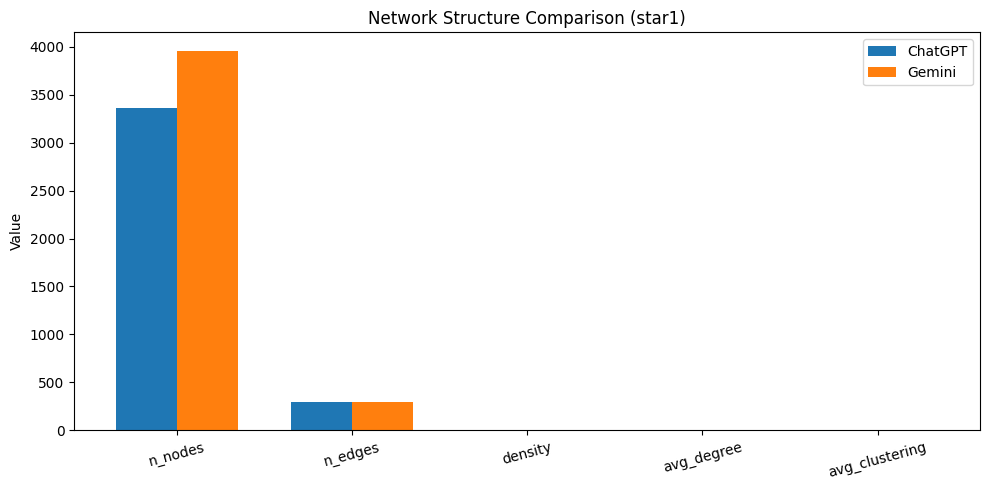

PNG Ï†ÄÏû•: /content/drive/MyDrive/AI_media_Text/ÏµúÏ¢ÖÎ¶¨Ìè¨Ìä∏/cooc_network_compare_bars_star1.png

--- 4Ï†ê Î¶¨Î∑∞ ÎÑ§Ìä∏ÏõåÌÅ¨ ÎπÑÍµê ---
=== ÎÑ§Ìä∏ÏõåÌÅ¨ Íµ¨Ï°∞ ÎπÑÍµê (‚≠ê4Ï†ê Î¶¨Î∑∞) ===


n_nodes  n_edges   density  avg_degree  avg_clustering
ChatGPT     2861      300  0.000073    0.209717        0.001457
Gemini      1953      300  0.000157    0.307220        0.001979


ÌïµÏã¨ ÎÖ∏Îìú ÏÉÅÏúÑ 50 Í∏∞Ï§Ä:
- Í≥µÌÜµ: 24
- GPT Ï†ÑÏö© ÏòàÏãú: ['new', 'please', 'information', 'one', 'take', 'photo', 'version', 'something', 'free', 'star', 'error', 'update', 'create', 'every', 'waste']
- Gemini Ï†ÑÏö© ÏòàÏãú: ['power', 'replace', 'home', 'google', 'open', 'without', 'set', 'old', 'gemini', 'hey', 'feature', 'thing', 'language', 'change', 'basic']
ÌïµÏã¨ÎÖ∏Îìú Jaccard Ïú†ÏÇ¨ÎèÑ: 0.316
Ïª§ÎÆ§ÎãàÌã∞ Í∞úÏàò ÎπÑÍµê - GPT:2734, Gemini:1836


u        v  weight_gpt
121       app     good        1316
122       app    great         727
71        gpt     chat         703
18     really      app         461
94       time     take         426
123       app     best         419
124       app     love         416
125       app     nice         400
19     really     good         394
126       app  helpful         393
38       like      app         357
196      give   answer         354
127       app  amazing         336
128       app   useful         333
217  question   answer         325

u          v  weight_gem
144     app       good         718
242  google  assistant         522
0        ai       good         312
145     app       nice         281
213    good        far         255
146     app      great         248
62   gemini     google         235
147     app       best         232
63   gemini       good         227
1        ai       best         210
130    chat        gpt         197
125  really       good         194
64   gemini        app         183
273     use       easy         182
135    give     answer         171

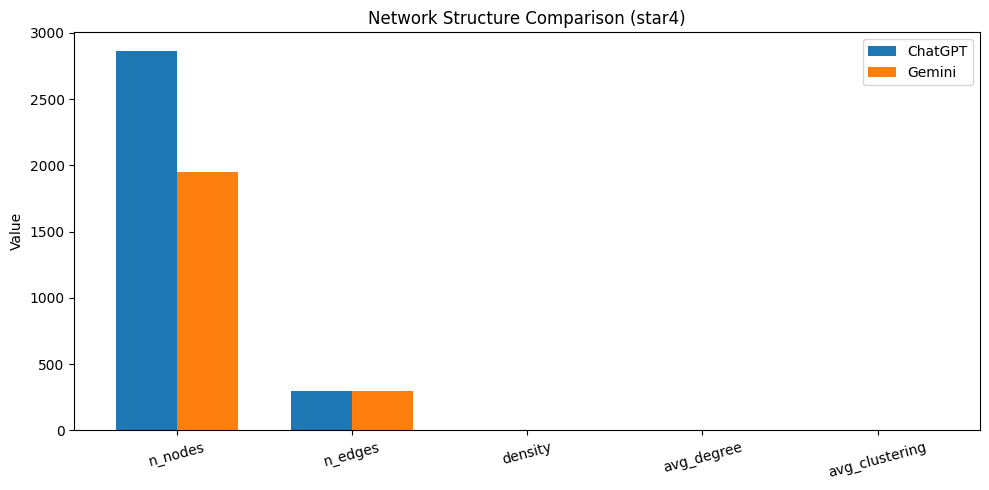

PNG Ï†ÄÏû•: /content/drive/MyDrive/AI_media_Text/ÏµúÏ¢ÖÎ¶¨Ìè¨Ìä∏/cooc_network_compare_bars_star4.png


In [14]:
# -------------------------------
# ÎÑ§Ìä∏ÏõåÌÅ¨ Íµ¨Ï°∞ ÎπÑÍµê Ìï®Ïàò
# -------------------------------
def compare_network_structures(G_gpt, G_gem, label=""):
    # Ï†ÑÏ≤¥ ÎÑ§Ìä∏ÏõåÌÅ¨ ÏöîÏïΩ ÏßÄÌëú ÎπÑÍµê
    gpt_sum_comp = {
        "n_nodes": G_gpt.number_of_nodes(),
        "n_edges": G_gpt.number_of_edges(),
        "density": nx.density(G_gpt) if G_gpt.number_of_nodes() > 1 else 0.0,
        "avg_degree": (2*G_gpt.number_of_edges()/G_gpt.number_of_nodes()) if G_gpt.number_of_nodes() > 0 else 0.0,
        "avg_clustering": nx.average_clustering(G_gpt, weight='weight') if G_gpt.number_of_nodes() > 0 else 0.0
    }
    gem_sum_comp = {
        "n_nodes": G_gem.number_of_nodes(),
        "n_edges": G_gem.number_of_edges(),
        "density": nx.density(G_gem) if G_gem.number_of_nodes() > 1 else 0.0,
        "avg_degree": (2*G_gem.number_of_edges()/G_gem.number_of_nodes()) if G_gem.number_of_nodes() > 0 else 0.0,
        "avg_clustering": nx.average_clustering(G_gem, weight='weight') if G_gem.number_of_nodes() > 0 else 0.0
    }

    cmp_df = pd.DataFrame([gpt_sum_comp, gem_sum_comp], index=["ChatGPT", "Gemini"])
    print(f"=== ÎÑ§Ìä∏ÏõåÌÅ¨ Íµ¨Ï°∞ ÎπÑÍµê ({label}) ===")
    display(cmp_df)

    # ÌïµÏã¨ ÎÖ∏Îìú ÎπÑÍµê (Jaccard Ïú†ÏÇ¨ÎèÑ)
    topN = 50
    top_gpt_nodes = set(gpt_nodes.head(topN)["node"])
    top_gem_nodes = set(gem_nodes.head(topN)["node"])
    common_nodes = top_gpt_nodes & top_gem_nodes
    gpt_only_nodes = top_gpt_nodes - top_gem_nodes
    gem_only_nodes = top_gem_nodes - top_gpt_nodes
    jaccard = len(common_nodes) / len(top_gpt_nodes | top_gem_nodes) if (top_gpt_nodes | top_gem_nodes) else 0.0

    print(f"\nÌïµÏã¨ ÎÖ∏Îìú ÏÉÅÏúÑ {topN} Í∏∞Ï§Ä:")
    print(f"- Í≥µÌÜµ: {len(common_nodes)}")
    print(f"- GPT Ï†ÑÏö© ÏòàÏãú: {list(gpt_only_nodes)[:15]}")
    print(f"- Gemini Ï†ÑÏö© ÏòàÏãú: {list(gem_only_nodes)[:15]}")
    print(f"ÌïµÏã¨ÎÖ∏Îìú Jaccard Ïú†ÏÇ¨ÎèÑ: {jaccard:.3f}")

    # Ïª§ÎÆ§ÎãàÌã∞ Í∞úÏàò ÎπÑÍµê (Louvain ÏïåÍ≥†Î¶¨Ï¶ò Îì± ÏÇ¨Ïö© Í∞ÄÎä•)
    # Í∞ÑÎã®ÌïòÍ≤åÎäî Ïó∞Í≤∞ ÏöîÏÜå Í∞úÏàò ÎπÑÍµê
    n_comm_gpt = nx.number_connected_components(G_gpt) if G_gpt.number_of_nodes() > 0 else 0
    n_comm_gem = nx.number_connected_components(G_gem) if G_gem.number_of_nodes() > 0 else 0
    print(f"Ïª§ÎÆ§ÎãàÌã∞ Í∞úÏàò ÎπÑÍµê - GPT:{n_comm_gpt}, Gemini:{n_comm_gem}")


# -------------------------------
# ÏãúÍ∞ÅÌôî Ìï®Ïàò (Ïû¨ÏÇ¨Ïö©)
# -------------------------------
# ÏßÄÌëú Î∞îÏ∞®Ìä∏ (ÎÖ∏ÎìúÏàò/Í∞ÑÏÑ†Ïàò/Î∞ÄÎèÑ/ÌèâÍ∑†Ï∞®Ïàò/ÌèâÍ∑†ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ)
def plot_network_metrics_comparison(gpt_sum_dict, gem_sum_dict, tag="", outdir="/content/drive/MyDrive/AI_media_Text/ÏµúÏ¢ÖÎ¶¨Ìè¨Ìä∏"):
    metrics = ["n_nodes", "n_edges", "density", "avg_degree", "avg_clustering"]
    vals_gpt = [gpt_sum_dict[m] for m in metrics]
    vals_gem = [gem_sum_dict[m] for m in metrics]

    x = np.arange(len(metrics))
    w = 0.35

    plt.figure(figsize=(10,5))
    plt.bar(x - w/2, vals_gpt, w, label="ChatGPT")
    plt.bar(x + w/2, vals_gem, w, label="Gemini")
    plt.xticks(x, metrics, rotation=15)
    plt.title(f"Network Structure Comparison ({tag})")
    plt.ylabel("Value")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"{outdir}/cooc_network_compare_bars_{tag}.png", dpi=200)
    plt.show()
    print("PNG Ï†ÄÏû•:", f"{outdir}/cooc_network_compare_bars_{tag}.png")


# -------------------------------
# 1Ï†ê Î¶¨Î∑∞ ÎÑ§Ìä∏ÏõåÌÅ¨ ÎπÑÍµê
# -------------------------------
print("\n--- 1Ï†ê Î¶¨Î∑∞ ÎÑ§Ìä∏ÏõåÌÅ¨ ÎπÑÍµê ---")
# Îã§Ïãú ÎÑ§Ìä∏ÏõåÌÅ¨ Íµ¨Ï∂ï (Ïù¥Ï†Ñ ÏÖÄÏóêÏÑú 4Ï†ê Î¶¨Î∑∞ Îç∞Ïù¥ÌÑ∞Î°ú gpt_nodes/edges, gem_nodes/edgesÍ∞Ä ÎçÆÏñ¥Ïì∞Ïó¨Ïßê)
text_col_gpt1 = pick_text_col(gpt_df_1)
gpt_texts_1 = gpt_df_1[text_col_gpt1].dropna().astype(str).tolist()
G_gpt1, gpt_nodes1, gpt_edges1, gpt_sum1 = build_cooc_network(
    gpt_texts_1, window_size=3, min_pair_count=5, min_node_freq=5, top_edges=300
)

text_col_gem1 = pick_text_col(gemini_df_1)
gem_texts_1 = gemini_df_1[text_col_gem1].dropna().astype(str).tolist()
G_gem1, gem_nodes1, gem_edges1, gem_sum1 = build_cooc_network(
    gem_texts_1, window_size=3, min_pair_count=5, min_node_freq=5, top_edges=300
)

compare_network_structures(G_gpt1, G_gem1, label="‚≠ê1Ï†ê Î¶¨Î∑∞")
display(gpt_edges1.head(15).rename(columns={"weight": "weight_gpt"}))
display(gem_edges1.head(15).rename(columns={"weight": "weight_gem"}))
plot_network_metrics_comparison(gpt_sum1, gem_sum1, tag="star1")


# -------------------------------
# 4Ï†ê Î¶¨Î∑∞ ÎÑ§Ìä∏ÏõåÌÅ¨ ÎπÑÍµê
# -------------------------------
print("\n--- 4Ï†ê Î¶¨Î∑∞ ÎÑ§Ìä∏ÏõåÌÅ¨ ÎπÑÍµê ---")
# Îã§Ïãú ÎÑ§Ìä∏ÏõåÌÅ¨ Íµ¨Ï∂ï (Ïù¥Ï†Ñ ÏÖÄÏóêÏÑú 1Ï†ê Î¶¨Î∑∞ Îç∞Ïù¥ÌÑ∞Î°ú gpt_nodes/edges, gem_nodes/edgesÍ∞Ä ÎçÆÏñ¥Ïì∞Ïó¨Ïßê)
text_col_gpt4 = pick_text_col(gpt_df_4)
gpt_texts_4 = gpt_df_4[text_col_gpt4].dropna().astype(str).tolist()
G_gpt4, gpt_nodes4, gpt_edges4, gpt_sum4 = build_cooc_network(
    gpt_texts_4, window_size=3, min_pair_count=5, min_node_freq=5, top_edges=300
)

text_col_gem4 = pick_text_col(gemini_df_4)
gem_texts_4 = gemini_df_4[text_col_gem4].dropna().astype(str).tolist()
G_gem4, gem_nodes4, gem_edges4, gem_sum4 = build_cooc_network(
    gem_texts_4, window_size=3, min_pair_count=5, min_node_freq=5, top_edges=300
)

compare_network_structures(G_gpt4, G_gem4, label="‚≠ê4Ï†ê Î¶¨Î∑∞")
display(gpt_edges4.head(15).rename(columns={"weight": "weight_gpt"}))
display(gem_edges4.head(15).rename(columns={"weight": "weight_gem"}))
plot_network_metrics_comparison(gpt_sum4, gem_sum4, tag="star4")

## 3. TF-IDF

In [15]:
# =====================
# TF-IDF ÏÑ§Ï†ï
# =====================
from sklearn.feature_extraction.text import TfidfVectorizer

# ÌÖçÏä§Ìä∏ Ïª¨Îüº ÏÑ†ÌÉù (lemmatized > clean_text > stemmed)
def pick_text_col(df):
    for c in ["lemmatized", "clean_text", "stemmed"]:
        if c in df.columns:
            return c
    raise KeyError("ÌÖçÏä§Ìä∏ Ïª¨Îüº ÏóÜÏùå")

# Í≥µÌÜµ vocabÏùÑ Ïì∞Í∏∞ ÏúÑÌï¥ GPT+Gemini Î¨∂Ïñ¥ÏÑú fit
text_col = pick_text_col(gpt_df_4)

all_texts = pd.concat([
    gpt_df_4[text_col].dropna().astype(str),
    gemini_df_4[text_col].dropna().astype(str),
    gpt_df_1[text_col].dropna().astype(str),
    gemini_df_1[text_col].dropna().astype(str)
])

# TF-IDF Î≤°ÌÑ∞ÎùºÏù¥Ï†Ä ÏÑ§Ï†ï
tfidf = TfidfVectorizer(
    ngram_range=(1,2),   # Îã®Ïñ¥+Ïù¥Í∑∏Îû®
    max_features=20000,  # ÏÉÅÏúÑ 2Îßå Îã®Ïñ¥ Ï†úÌïú
    min_df=3             # ÏµúÏÜå 3Î¨∏ÏÑú Ïù¥ÏÉÅ Îì±Ïû•
)

tfidf.fit(all_texts)

print("‚úÖ TF-IDF Î≤°ÌÑ∞ÎùºÏù¥Ï†Ä ÌïôÏäµ ÏôÑÎ£å")
print("Vocabulary ÌÅ¨Í∏∞:", len(tfidf.get_feature_names_out()))


‚úÖ TF-IDF Î≤°ÌÑ∞ÎùºÏù¥Ï†Ä ÌïôÏäµ ÏôÑÎ£å
Vocabulary ÌÅ¨Í∏∞: 20000


In [16]:
import numpy as np

# ÏÑúÎπÑÏä§Î≥Ñ TF-IDF ÌñâÎ†¨ Î≥ÄÌôò
X_gpt4    = tfidf.transform(gpt_df_4[text_col].dropna().astype(str))
X_gem4    = tfidf.transform(gemini_df_4[text_col].dropna().astype(str))
X_gpt1    = tfidf.transform(gpt_df_1[text_col].dropna().astype(str))
X_gem1    = tfidf.transform(gemini_df_1[text_col].dropna().astype(str))

vocab = np.array(tfidf.get_feature_names_out())

# Î¨∏ÏÑú ÌèâÍ∑† TF-IDF ‚Üí ÏÑúÎπÑÏä§ ÎåÄÌëú ÌÇ§ÏõåÎìú ÎΩëÍ∏∞
def top_tfidf_terms(X, vocab, top_n=20):
    mean_scores = np.asarray(X.mean(axis=0)).ravel()
    idx = mean_scores.argsort()[::-1][:top_n]
    return pd.DataFrame({"term": vocab[idx], "tfidf": mean_scores[idx]})

gpt4_top = top_tfidf_terms(X_gpt4, vocab, 20)
gem4_top = top_tfidf_terms(X_gem4, vocab, 20)
gpt1_top = top_tfidf_terms(X_gpt1, vocab, 20)
gem1_top = top_tfidf_terms(X_gem1, vocab, 20)

print("=== GPT 4Ï†ê Top TF-IDF ===\n", gpt4_top)
print("\n=== Gemini 4Ï†ê Top TF-IDF ===\n", gem4_top)
print("\n=== GPT 1Ï†ê Top TF-IDF ===\n", gpt1_top)
print("\n=== Gemini 1Ï†ê Top TF-IDF ===\n", gem1_top)


=== GPT 4Ï†ê Top TF-IDF ===
          term     tfidf
0         app  0.042629
1        good  0.037185
2     helpful  0.020322
3        like  0.018670
4       great  0.018015
5       image  0.017239
6      really  0.016704
7     chatgpt  0.016390
8        time  0.016329
9      useful  0.016179
10       chat  0.015989
11       help  0.015336
12       nice  0.015315
13       best  0.014767
14        use  0.014454
15  sometimes  0.014417
16         ai  0.014397
17       give  0.013128
18       love  0.012766
19     answer  0.012500

=== Gemini 4Ï†ê Top TF-IDF ===
         term     tfidf
0       good  0.176273
1       nice  0.061340
2        app  0.026179
3      great  0.022187
4       best  0.022074
5     gemini  0.017467
6    helpful  0.016811
7         ai  0.014373
8       like  0.012834
9         ok  0.012448
10  good app  0.012382
11    better  0.012090
12    useful  0.011704
13      need  0.010458
14      love  0.010285
15    google  0.009493
16       far  0.009486
17     super  0.0088

--- TF-IDF ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÏãúÍ∞ÅÌôî ---
[Ï†ïÎ≥¥] ÎÇòÎàîÍ≥†Îîï Ìè∞Ìä∏Í∞Ä ÏóÜÏñ¥ '/usr/local/lib/python3.12/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf' Ìè∞Ìä∏Î•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.


/tmp/ipython-input-1901218588.py:42: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


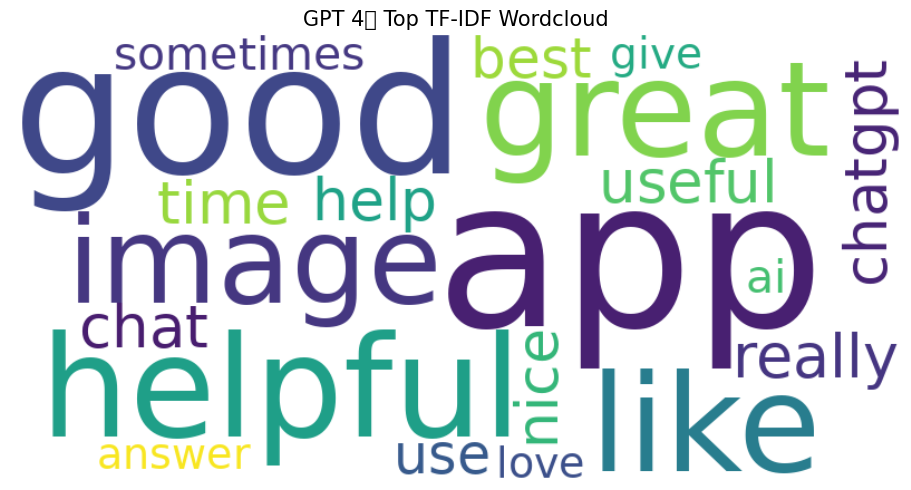

[Ï†ïÎ≥¥] ÎÇòÎàîÍ≥†Îîï Ìè∞Ìä∏Í∞Ä ÏóÜÏñ¥ '/usr/local/lib/python3.12/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf' Ìè∞Ìä∏Î•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.


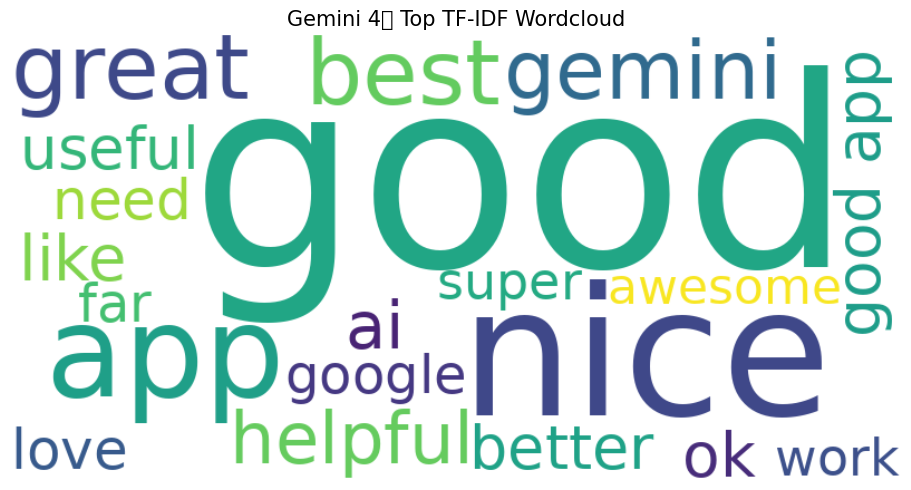

[Ï†ïÎ≥¥] ÎÇòÎàîÍ≥†Îîï Ìè∞Ìä∏Í∞Ä ÏóÜÏñ¥ '/usr/local/lib/python3.12/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf' Ìè∞Ìä∏Î•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.


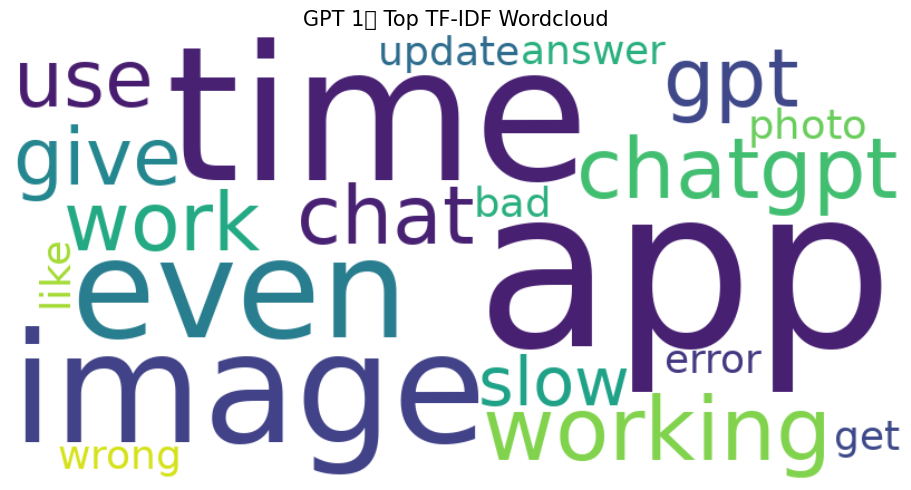

[Ï†ïÎ≥¥] ÎÇòÎàîÍ≥†Îîï Ìè∞Ìä∏Í∞Ä ÏóÜÏñ¥ '/usr/local/lib/python3.12/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf' Ìè∞Ìä∏Î•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.


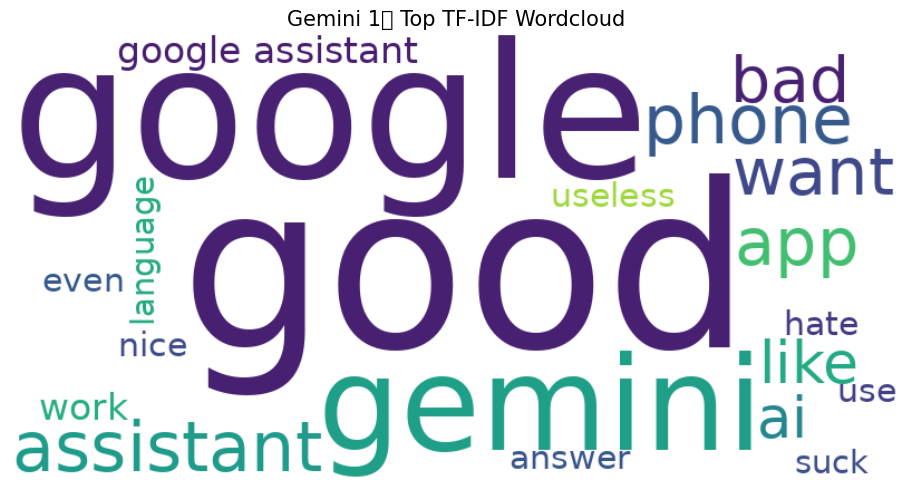

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os

# --------------------------
# ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÏÉùÏÑ± Î∞è ÏãúÍ∞ÅÌôî Ìï®Ïàò
# --------------------------
def plot_wordcloud(tfidf_df, title, colname="term", max_words=100, width=800, height=400):
    if tfidf_df.empty:
        print(f"[Í≤ΩÍ≥†] {title}: TF-IDF Îç∞Ïù¥ÌÑ∞ ÏóÜÏùå")
        return

    # TF-IDF Ï†êÏàòÎ•º Î∞îÌÉïÏúºÎ°ú Îã®Ïñ¥ÏôÄ ÎπàÎèÑ Îß§Ìïë ÏÉùÏÑ±
    word_freq = dict(zip(tfidf_df[colname], tfidf_df["tfidf"]))

    # Colab ÌôòÍ≤ΩÏóê ÎÇòÎàîÍ≥†Îîï Ìè∞Ìä∏Í∞Ä ÏûàÎäîÏßÄ ÌôïÏù∏ÌïòÍ≥† Í≤ΩÎ°ú ÏÑ§Ï†ï
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
    if not os.path.exists(font_path):
        # ÎÇòÎàîÍ≥†ÎîïÏù¥ ÏóÜÏúºÎ©¥ Îã§Î•∏ Í∏∞Î≥∏ Ìè∞Ìä∏ ÏÇ¨Ïö© (Ïòà: DejaVu Sans)
        # fm.findSystemFonts(fontpaths=None, fontext='ttf')
        # print(fm.findfont(fm.FontProperties(family='DejaVu Sans')))
        font_path = fm.findfont(fm.FontProperties(family='DejaVu Sans'))
        print(f"[Ï†ïÎ≥¥] ÎÇòÎàîÍ≥†Îîï Ìè∞Ìä∏Í∞Ä ÏóÜÏñ¥ '{font_path}' Ìè∞Ìä∏Î•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.")


    wc = WordCloud(
        font_path=font_path, # Ìè∞Ìä∏ Í≤ΩÎ°ú
        background_color="white",
        max_words=max_words,
        width=width,
        height=height,
        random_state=42
    )

    wordcloud = wc.generate_from_frequencies(word_freq)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=15)
    plt.tight_layout()
    plt.show()

# --------------------------
# ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÏãúÍ∞ÅÌôî Ïã§Ìñâ
# --------------------------
print("--- TF-IDF ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÏãúÍ∞ÅÌôî ---")

# ÎÇòÎàî Ìè∞Ìä∏ Ï∫êÏãú ÏÇ≠Ï†ú Î∞è Ïû¨ÎπåÎìú (ÌïúÍ∏Ä Íπ®Ïßê Î∞©ÏßÄ)
try:
    fm._load_fontmanager(try_read_cache=False)
except Exception as e:
    print(f"[Í≤ΩÍ≥†] Ìè∞Ìä∏ Ï∫êÏãú Î°úÎî© Ï§ë Ïò§Î•ò Î∞úÏÉù: {e}")


plot_wordcloud(gpt4_top, "GPT 4Ï†ê Top TF-IDF Wordcloud")
plot_wordcloud(gem4_top, "Gemini 4Ï†ê Top TF-IDF Wordcloud")
plot_wordcloud(gpt1_top, "GPT 1Ï†ê Top TF-IDF Wordcloud")
plot_wordcloud(gem1_top, "Gemini 1Ï†ê Top TF-IDF Wordcloud")

## 4. LDA Î∂ÑÏÑù

### LDA ÏÑ§Ï†ï

In [18]:
# ÎùºÏù¥Î∏åÎü¨Î¶¨ Ïù∏Ïä§ÌÜ®
!pip install gensim
!pip -q install pyLDAvis

In [19]:
# =====================
# LDA ÏÑ§Ï†ï
# =====================
from sklearn.feature_extraction.text import CountVectorizer
import gensim
from gensim import corpora

# ÌÖçÏä§Ìä∏ Ïª¨Îüº
text_col = pick_text_col(gpt_df_4)

# Î¶¨Î∑∞ ÌÖçÏä§Ìä∏ Î™®ÏúºÍ∏∞
gpt4_texts    = gpt_df_4[text_col].dropna().astype(str).tolist()
gem4_texts    = gemini_df_4[text_col].dropna().astype(str).tolist()
gpt1_texts    = gpt_df_1[text_col].dropna().astype(str).tolist()
gem1_texts    = gemini_df_1[text_col].dropna().astype(str).tolist()

# Í∞ÑÎã® ÌÜ†ÌÅ∞Ìôî
def tokenize(texts):
    return [t.split() for t in texts]

gpt4_tokens = tokenize(gpt4_texts)
gem4_tokens = tokenize(gem4_texts)
gpt1_tokens = tokenize(gpt1_texts)
gem1_tokens = tokenize(gem1_texts)


### LDA Î∂ÑÏÑù

In [20]:
# =====================
# LDA Î∂ÑÏÑù
# =====================
from gensim.models.ldamodel import LdaModel

def run_lda(tokens, num_topics=5, passes=10):
    # Dictionary & Corpus
    dictionary = corpora.Dictionary(tokens)
    dictionary.filter_extremes(no_below=5, no_above=0.5)  # ÏµúÏÜå 5Ìöå Ïù¥ÏÉÅ, ÏÉÅÏúÑ 50% ÎØ∏Îßå Î¨∏ÏÑú Îì±Ïû•
    corpus = [dictionary.doc2bow(text) for text in tokens]

    # LDA Î™®Îç∏ ÌïôÏäµ
    lda = LdaModel(corpus=corpus,
                   id2word=dictionary,
                   num_topics=num_topics,
                   passes=passes,
                   random_state=42)
    return lda, corpus, dictionary

# Ïã§Ìñâ (Ïòà: Î≥ÑÏ†ê 4 GPT Î¶¨Î∑∞)
lda_gpt4, corpus_gpt4, dict_gpt4 = run_lda(gpt4_tokens, num_topics=5)
lda_gem4, corpus_gem4, dict_gem4 = run_lda(gem4_tokens, num_topics=5)
lda_gpt1, corpus_gpt1, dict_gpt1 = run_lda(gpt1_tokens, num_topics=5)
lda_gem1, corpus_gem1, dict_gem1 = run_lda(gem1_tokens, num_topics=5)

# ÌÜ†ÌîΩÎ≥Ñ Ï£ºÏöî ÌÇ§ÏõåÎìú Ï∂úÎ†•
print("=== GPT ‚òÖ1 ===")
for idx, topic in lda_gpt1.show_topics(num_topics=5, num_words=10, formatted=False):
    print(f"Topic {idx}: {[w for w, _ in topic]}")

print("\n=== Gemini ‚òÖ1 ===")
for idx, topic in lda_gem1.show_topics(num_topics=5, num_words=10, formatted=False):
    print(f"Topic {idx}: {[w for w, _ in topic]}")

# ÌÜ†ÌîΩÎ≥Ñ Ï£ºÏöî ÌÇ§ÏõåÎìú Ï∂úÎ†•
print("=== GPT ‚òÖ4 ===")
for idx, topic in lda_gpt4.show_topics(num_topics=5, num_words=10, formatted=False):
    print(f"Topic {idx}: {[w for w, _ in topic]}")

print("\n=== Gemini ‚òÖ4 ===")
for idx, topic in lda_gem4.show_topics(num_topics=5, num_words=10, formatted=False):
    print(f"Topic {idx}: {[w for w, _ in topic]}")

=== GPT ‚òÖ1 ===
Topic 0: ['chat', 'gpt', 'update', 'like', 'voice', 'new', 'chatgpt', 'back', 'conversation', 'text']
Topic 1: ['free', 'limit', 'plus', 'subscription', 'use', 'version', 'money', 'pay', 'paid', 'get']
Topic 2: ['app', 'working', 'work', 'error', 'phone', 'please', 'issue', 'problem', 'use', 'login']
Topic 3: ['image', 'time', 'app', 'photo', 'slow', 'bad', 'picture', 'working', 'take', 'create']
Topic 4: ['give', 'answer', 'app', 'question', 'ai', 'wrong', 'time', 'information', 'ask', 'good']

=== Gemini ‚òÖ1 ===
Topic 0: ['bad', 'ai', 'nice', 'app', 'worst', 'useless', 'better', 'poor', 'chatgpt', 'chat']
Topic 1: ['answer', 'time', 'question', 'give', 'gemini', 'wrong', 'asked', 'ask', 'information', 'say']
Topic 2: ['google', 'assistant', 'work', 'gemini', 'like', 'ok', 'use', 'even', 'voice', 'app']
Topic 3: ['want', 'phone', 'suck', 'app', 'hate', 'language', 'gemini', 'change', 'get', 'uninstall']
Topic 4: ['good', 'working', 'hai', 'image', 'slow', 'generate',

### ÏãúÍ∞ÅÌôî

GPT ‚òÖ4  Gemini ‚òÖ4
Topic 1 - app, good, answer  0.330949   0.260696
Topic 2 - chatgpt, user, ai  0.130813   0.231788
Topic 3 - chat, gpt, app     0.173913   0.162621
Topic 4 - app, good, like    0.182461   0.162060
Topic 5 - good, image, app   0.181864   0.182835

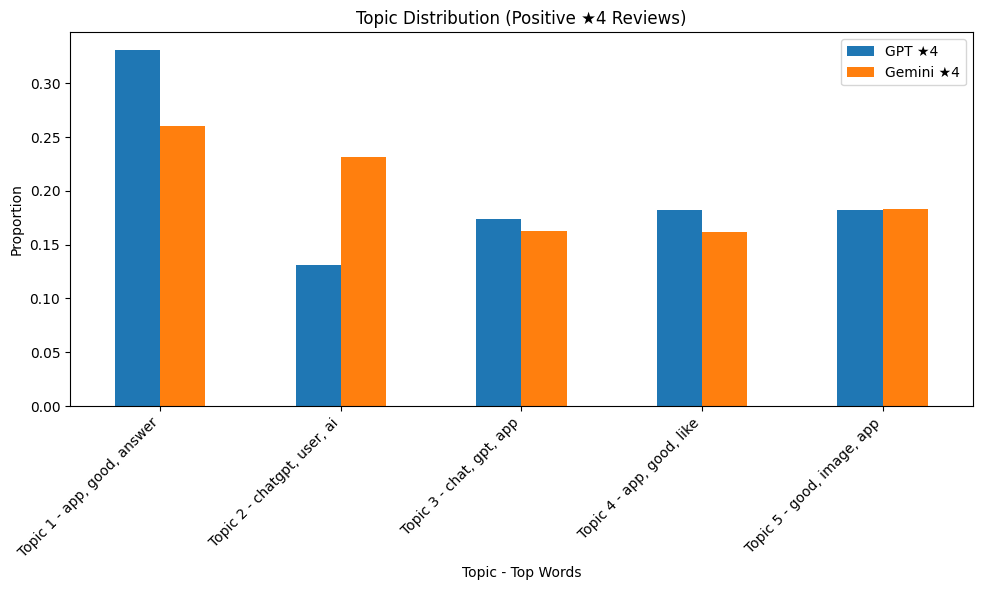

GPT ‚òÖ1  Gemini ‚òÖ1
Topic 1 - chat, gpt, update   0.209959   0.180845
Topic 2 - free, limit, plus   0.141468   0.222039
Topic 3 - app, working, work  0.210048   0.242373
Topic 4 - image, time, app    0.227523   0.227058
Topic 5 - give, answer, app   0.211001   0.127684

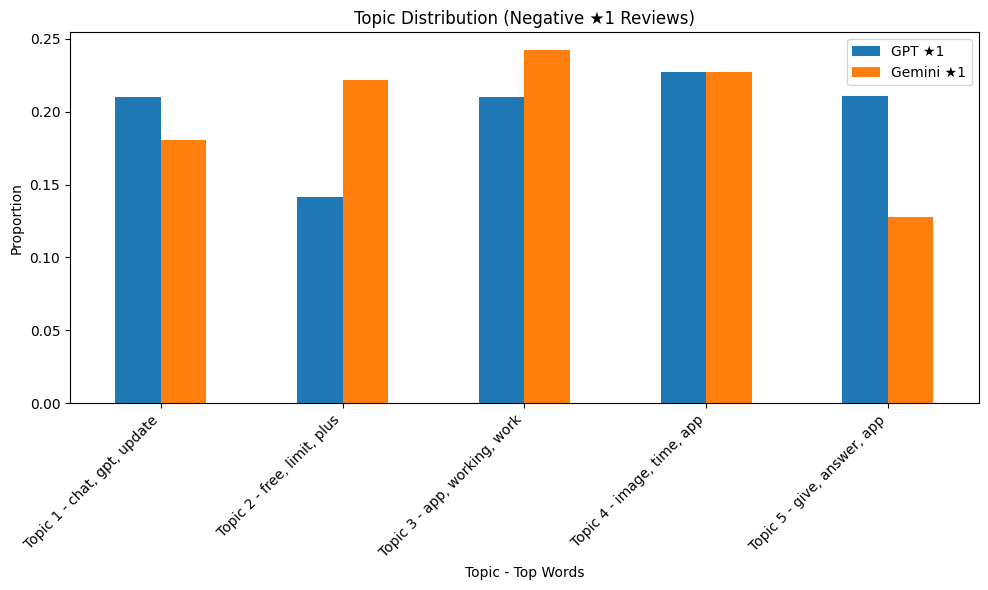

In [21]:
# =====================
# LDA Ï£ºÏ†ú Î∂ÑÌè¨ ÎπÑÍµê ÎßâÎåÄÍ∑∏ÎûòÌîÑ (Í∞úÏÑ†Î≥∏)
# =====================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # (ÏÑ†ÌÉù) Ïä§ÌÉÄÏùºÎßå ÌïÑÏöîÌïòÎ©¥ ÏÉùÎûµ Í∞ÄÎä•
from pathlib import Path

outdir = "/content/drive/MyDrive/AI_media_Text/ÏµúÏ¢ÖÎ¶¨Ìè¨Ìä∏"
Path(outdir).mkdir(parents=True, exist_ok=True)

# Î¨∏ÏÑúÎ≥Ñ ÌÜ†ÌîΩ Î∂ÑÌè¨ (ÎπÑÏú®) Í≥ÑÏÇ∞
def get_topic_distribution(lda, corpus, n_topics=5):
    dist = np.zeros(n_topics, dtype=float)
    total = 0.0
    for bow in corpus:
        d = lda.get_document_topics(bow, minimum_probability=0.0)
        # dÎäî (topic_id, prob) Î¶¨Ïä§Ìä∏. Ìï©=1.0 Î≥¥Ïû•. Î¨∏ÏÑú 1Í∞ú Ï≤òÎ¶¨ Ïãú total += 1
        for tid, prob in d:
            dist[tid] += prob
        total += 1.0
    if total == 0:             # Î¨∏ÏÑúÍ∞Ä ÏóÜÎäî Í≤ΩÏö∞ Î∞©Ïñ¥
        return np.zeros(n_topics, dtype=float)
    return dist / dist.sum()   # Ï†ÑÏ≤¥ Ìï©ÏúºÎ°ú Ï†ïÍ∑úÌôî(ÎπÑÏú®)

# ÌÜ†ÌîΩ Î†àÏù¥Î∏î(ÎåÄÌëú Îã®Ïñ¥)
def get_topic_labels(lda, topn=3):
    labels = {}
    for tid, terms in lda.show_topics(num_topics=lda.num_topics, num_words=topn, formatted=False):
        top_words = ", ".join([w for w, _ in terms])
        labels[tid] = f"Topic {tid+1} - {top_words}"
    return labels

# ----------------------------
# Í∏çÏ†ï Î¶¨Î∑∞ (‚òÖ4) Ï£ºÏ†ú Î∂ÑÌè¨: GPT vs Gemini (Í∞ÅÏûê ÌïôÏäµÌïú ÌÜ†ÌîΩÏù¥ÎØÄÎ°ú 'Î≥ÑÎèÑ' ÎπÑÍµê)
# ----------------------------
labels_gpt4 = get_topic_labels(lda_gpt4, topn=3)
labels_gem4 = get_topic_labels(lda_gem4, topn=3)

gpt4_dist = get_topic_distribution(lda_gpt4, corpus_gpt4, n_topics=5)
gem4_dist = get_topic_distribution(lda_gem4, corpus_gem4, n_topics=5)

df_dist4 = pd.DataFrame({
    "GPT ‚òÖ4": gpt4_dist,
    "Gemini ‚òÖ4": gem4_dist
}, index=[labels_gpt4[i] for i in range(5)])  # xÏ∂ïÏùÄ GPT‚òÖ4Ïùò ÌÜ†ÌîΩ ÎùºÎ≤®Î°ú Í≥†Ï†ï

display(df_dist4)

ax = df_dist4.plot(kind="bar", figsize=(10,6))
ax.set_title("Topic Distribution (Positive ‚òÖ4 Reviews)")
ax.set_ylabel("Proportion")
ax.set_xlabel("Topic - Top Words")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig(f"{outdir}/lda_topic_dist_star4.png", dpi=200)
plt.show()

# ----------------------------
# Î∂ÄÏ†ï Î¶¨Î∑∞ (‚òÖ1) Ï£ºÏ†ú Î∂ÑÌè¨: GPT vs Gemini (Í∞ÅÏûê ÌïôÏäµÌïú ÌÜ†ÌîΩÏù¥ÎØÄÎ°ú 'Î≥ÑÎèÑ' ÎπÑÍµê)
# ----------------------------
labels_gpt1 = get_topic_labels(lda_gpt1, topn=3)
labels_gem1 = get_topic_labels(lda_gem1, topn=3)

gpt1_dist = get_topic_distribution(lda_gpt1, corpus_gpt1, n_topics=5)
gem1_dist = get_topic_distribution(lda_gem1, corpus_gem1, n_topics=5)

df_dist1 = pd.DataFrame({
    "GPT ‚òÖ1": gpt1_dist,
    "Gemini ‚òÖ1": gem1_dist
}, index=[labels_gpt1[i] for i in range(5)])  # xÏ∂ïÏùÄ GPT‚òÖ1Ïùò ÌÜ†ÌîΩ ÎùºÎ≤®Î°ú Í≥†Ï†ï

display(df_dist1)

ax = df_dist1.plot(kind="bar", figsize=(10,6))
ax.set_title("Topic Distribution (Negative ‚òÖ1 Reviews)")
ax.set_ylabel("Proportion")
ax.set_xlabel("Topic - Top Words")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig(f"{outdir}/lda_topic_dist_star1.png", dpi=200)
plt.show()


In [22]:
# =====================
# LDAvis
# =====================
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

def visualize_lda(lda_model, corpus, dictionary, html_path):
    vis = gensimvis.prepare(lda_model, corpus, dictionary)
    pyLDAvis.save_html(vis, html_path)
    print("üíæ LDAvis Ï†ÄÏû•:", html_path)

outdir = "/content/drive/MyDrive/AI_media_Text/ÏµúÏ¢ÖÎ¶¨Ìè¨Ìä∏"

# Ïòà: GPT 4Ï†ê Î¶¨Î∑∞ ÏãúÍ∞ÅÌôî
visualize_lda(lda_gpt4, corpus_gpt4, dict_gpt4, f"{outdir}/lda_gpt_star4.html")
visualize_lda(lda_gem4, corpus_gem4, dict_gem4, f"{outdir}/lda_gem_star4.html")

# 1Ï†ê Î¶¨Î∑∞ÎèÑ ÎèôÏùºÌïòÍ≤å Ï†ÄÏû• Í∞ÄÎä•
visualize_lda(lda_gpt1, corpus_gpt1, dict_gpt1, f"{outdir}/lda_gpt_star1.html")
visualize_lda(lda_gem1, corpus_gem1, dict_gem1, f"{outdir}/lda_gem_star1.html")


üíæ LDAvis Ï†ÄÏû•: /content/drive/MyDrive/AI_media_Text/ÏµúÏ¢ÖÎ¶¨Ìè¨Ìä∏/lda_gpt_star4.html


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

üíæ LDAvis Ï†ÄÏû•: /content/drive/MyDrive/AI_media_Text/ÏµúÏ¢ÖÎ¶¨Ìè¨Ìä∏/lda_gem_star4.html


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

üíæ LDAvis Ï†ÄÏû•: /content/drive/MyDrive/AI_media_Text/ÏµúÏ¢ÖÎ¶¨Ìè¨Ìä∏/lda_gpt_star1.html


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

üíæ LDAvis Ï†ÄÏû•: /content/drive/MyDrive/AI_media_Text/ÏµúÏ¢ÖÎ¶¨Ìè¨Ìä∏/lda_gem_star1.html


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

# Í∞êÏ†ï Î∂ÑÏÑù

In [23]:
# =====================
# Í∞êÏÑ± Î∂ÑÏÑù ÏÑ§Ï†ï (VADER)
# =====================
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

# ÌÖçÏä§Ìä∏ Ïª¨Îüº ÏÑ†ÌÉù
def pick_text_col(df: pd.DataFrame):
    for c in ["lemmatized", "clean_text", "stemmed"]:
        if c in df.columns:
            return c
    raise KeyError("ÌÖçÏä§Ìä∏ Ïª¨Îüº(lemmatized/clean_text/stemmed)Ïù¥ ÏóÜÏäµÎãàÎã§.")

# NLTK VADER
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

try:
    _ = nltk.data.find("sentiment/vader_lexicon.zip")
except LookupError:
    nltk.download("vader_lexicon")

SIA = SentimentIntensityAnalyzer()

# ÏïàÏ†Ñ ÌÜ†ÌÅ∞/ÌÅ¥Î¶∞ (ÏòÅÎ¨∏ Ïô∏ ÏûîÏó¨ ÌäπÎ¨∏ Î∞©Ïñ¥)
def clean_text(s: str) -> str:
    if pd.isna(s): return ""
    s = str(s)
    s = re.sub(r"\s+", " ", s).strip()
    return s


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

### Í∏çÏ†ï, Ï§ëÎ¶Ω, Î∂ÄÏ†ï Î∂ÑÌè¨Ìëú

In [24]:
# =====================
# Í∞êÏÑ± ÎùºÎ≤®ÎßÅ & Î∂ÑÌè¨Ìëú
# =====================
def label_sentiment(text: str) -> str:
    text = clean_text(text)
    if not text:
        return "neutral"
    c = SIA.polarity_scores(text)["compound"]
    if c >= 0.05:
        return "positive"
    elif c <= -0.05:
        return "negative"
    else:
        return "neutral"

def sentiment_distribution(df: pd.DataFrame, name: str):
    col = pick_text_col(df)
    tmp = df[[col]].copy()
    tmp["sentiment"] = tmp[col].astype(str).map(label_sentiment)
    dist = tmp["sentiment"].value_counts(dropna=False).reindex(["positive","neutral","negative"]).fillna(0).astype(int)
    prop = (dist / max(1, dist.sum())).round(4)
    out = pd.DataFrame({"count": dist, "ratio": prop})
    out.index.name = f"{name}"
    return out

# ‚òÖ4(Í∏çÏ†ï Î¶¨Î∑∞ ÏßëÌï©) / ‚òÖ1(Î∂ÄÏ†ï Î¶¨Î∑∞ ÏßëÌï©) Í∞ÅÍ∞Å ChatGPT vs Gemini ÎπÑÍµê
dist_gpt4 = sentiment_distribution(gpt_df_4, "ChatGPT ‚òÖ4")
dist_gem4 = sentiment_distribution(gemini_df_4, "Gemini  ‚òÖ4")
dist_gpt1 = sentiment_distribution(gpt_df_1, "ChatGPT ‚òÖ1")
dist_gem1 = sentiment_distribution(gemini_df_1, "Gemini  ‚òÖ1")

print("‚úÖ Î∂ÑÌè¨Ìëú (‚òÖ4)")
display(pd.concat([dist_gpt4, dist_gem4], axis=1))

print("\n‚úÖ Î∂ÑÌè¨Ìëú (‚òÖ1)")
display(pd.concat([dist_gpt1, dist_gem1], axis=1))


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

‚úÖ Î∂ÑÌè¨Ìëú (‚òÖ4)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


count   ratio  count   ratio
positive  13175  0.8632  17227  0.8173
neutral     994  0.0651   3072  0.1457
negative   1094  0.0717    779  0.0370


‚úÖ Î∂ÑÌè¨Ìëú (‚òÖ1)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


count   ratio  count   ratio
positive   5656  0.3954  13176  0.3334
neutral    2336  0.1633  12564  0.3179
negative   6311  0.4412  13780  0.3487

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

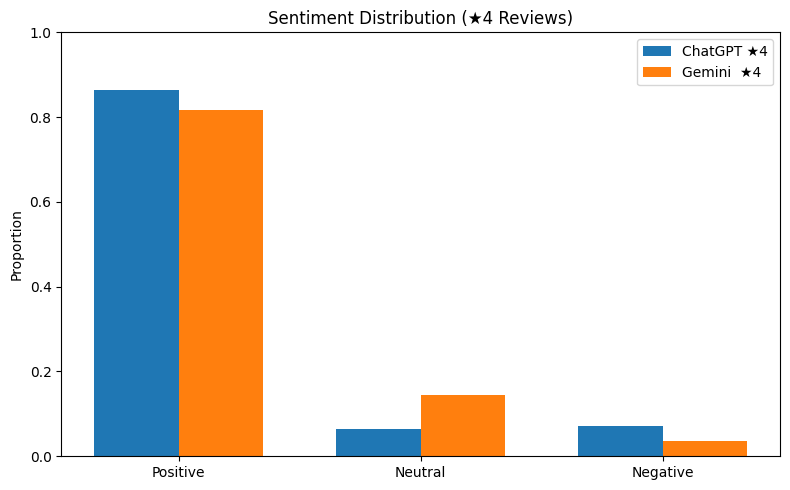

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

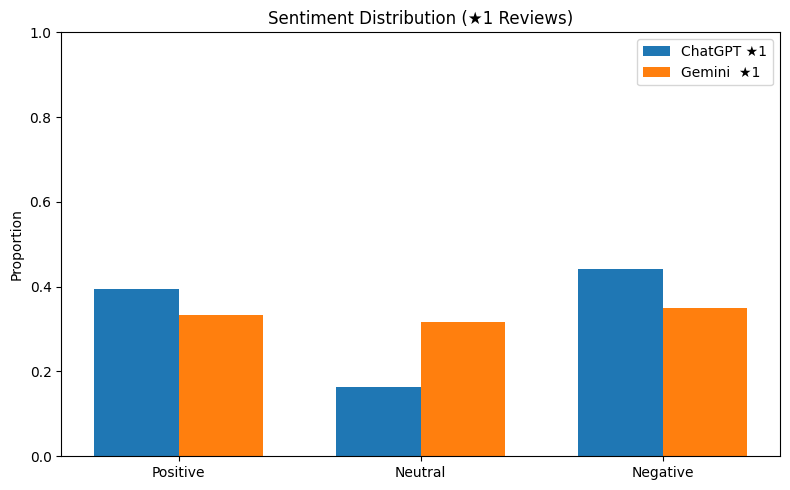

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [25]:
# =====================
# Í∞êÏÑ± Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
# =====================
import matplotlib.pyplot as plt

def plot_sentiment_bars(dist_left: pd.DataFrame, dist_right: pd.DataFrame, title: str, save_path=None):
    # dist_* Îäî indexÍ∞Ä 'positive, neutral, negative' ÏàúÏÑúÏùò Ìñâ DFÏó¨Ïïº Ìï®
    labels = ["positive","neutral","negative"]
    left_vals  = dist_left.loc[labels, "ratio"].values
    right_vals = dist_right.loc[labels, "ratio"].values

    x = np.arange(len(labels))
    w = 0.35

    plt.figure(figsize=(8,5))
    plt.bar(x - w/2, left_vals,  width=w, label=dist_left.index.name)
    plt.bar(x + w/2, right_vals, width=w, label=dist_right.index.name)
    plt.xticks(x, ["Positive","Neutral","Negative"])
    plt.ylim(0, 1)
    plt.ylabel("Proportion")
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=200)
    plt.show()

# Ïã§Ìñâ: Î≥ÑÏ†ê 4/1 Í∞ÅÍ∞Å ÎπÑÍµê
plot_sentiment_bars(dist_gpt4, dist_gem4, "Sentiment Distribution (‚òÖ4 Reviews)",
                    save_path="/content/drive/MyDrive/AI_media_Text/ÏµúÏ¢ÖÎ¶¨Ìè¨Ìä∏/sentiment_star4.png")
plot_sentiment_bars(dist_gpt1, dist_gem1, "Sentiment Distribution (‚òÖ1 Reviews)",
                    save_path="/content/drive/MyDrive/AI_media_Text/ÏµúÏ¢ÖÎ¶¨Ìè¨Ìä∏/sentiment_star1.png")


### Í∞êÏÑ±Î≥Ñ Îã®Ïñ¥ ÎπàÎèÑ Î∂ÑÏÑù